<a href="https://colab.research.google.com/github/agsbenitez/dataScience/blob/master/AnalisisArboladoCtes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicio

Trabajo Integrador del Curso de Data Science de la Plataforma CoderHouse


Se trabaja sobre dos dataset generados por la muncipalidad de la Ciudad de Corrientes, los cuales se encuentran disponibles en su portal de datos abiertos.

Estos dataset están referidos a arbolado urbando de la ciudad


Podrá hacer una pruba del modelo en la siguiente url: https://agsbenitez-webappml-webapp-ujry6c.streamlit.app/

Encontrará una presentanción en la siguiente url: https://docs.google.com/presentation/d/e/2PACX-1vT6hqBHPCwfzw5yAzj3TrBhFxYwZ96DrJMQDd8VPV0PNqnCtMfzaHzaufUMWNch5S9Bl7cU06MBW33P/pub?start=false&loop=false&delayms=3000

# Importacion de Librería y DataSet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
arbolado=pd.read_csv('https://raw.githubusercontent.com/agsbenitez/dataScience/master/DatasetArboladoArbolesFull.csv', index_col=0)
arbolado.head()

,id_seguimiento,id_arbol,fecha_hora,tipo_seguimiento,estado_salud,fuste,tipo_cazoleta,ahuecamiento,inclinacion,altura,...,luz_led,direccion,tipo_vereda,lado_vereda,especie,tipo_tendido,distancia_entre_ar,distancia_al_muro,lng,lat
0,1,8,11/05/2023 11:13:08,Plantacion,Bueno,Entre 0.10 y 0.40 m,Mediana,No,Sin inclinación,Menor a 5 m,...,Si,San Juan 1278,Chica,Par,Crespón,Ninguno,5.0,1.0,-58.837098,-27.471856
1,3,16,11/05/2023 11:25:05,Plantacion,Bueno,Menor a 0.10 m,Nivel del Piso,No,Sin inclinación,Menor a 5 m,...,Si,San juan 1268,Chica,Impar,Crespón,Ninguno,5.0,1.0,-58.837121,-27.471663
2,4,17,11/05/2023 11:27:05,Plantacion,Bueno,Menor a 0.10 m,Chica,No,Sin inclinación,Menor a 5 m,...,Si,Bolivar 1074,Mediana,Par,Paraíso,Media Tensión (Con Protección),5.0,2.0,-58.837567,-27.470889
3,5,18,11/05/2023 11:33:16,Plantacion,Bueno,Entre 0.10 y 0.40 m,Mediana,No,Sin inclinación,Menor a 5 m,...,Si,Bolívar 1110,Grande,Par,Crespón,Preensamblado,3.0,1.0,-58.836943,-27.470922
4,6,19,11/05/2023 11:34:17,Plantacion,Bueno,Menor a 0.10 m,Nivel del Piso,No,Sin inclinación,Menor a 5 m,...,Si,Bolivar 1134,Grande,Par,Crespón,Preensamblado,5.0,2.0,-58.836670,-27.470951


# Análisis de variables

In [5]:
#Impresión de tamaño del dataset
arbolado.shape

(3104, 25)

In [6]:
#impresión de las variables de componen el dataSet
arbolado.columns


Index(['id_seguimiento', 'id_arbol', 'fecha_hora', 'tipo_seguimiento',
       'estado_salud', 'fuste', 'tipo_cazoleta', 'ahuecamiento', 'inclinacion',
       'altura', 'fase_vital', 'riesgo', 'levantamiento_vereda', 'tipo_tierra',
       'tipo_calle', 'luz_led', 'direccion', 'tipo_vereda', 'lado_vereda',
       'especie', 'tipo_tendido', 'distancia_entre_ar', 'distancia_al_muro',
       'lng', 'lat'],
      dtype='object')

In [7]:
#Se exponen los valores de la variable riesgo
arbolado.riesgo.unique()

array(['Sin riesgo de caída', 'Arbol parasitado (con especies vegetales)',
       'Con riesgo de caída (alto)', 'Otros parásitos (fuste)',
       'Arbol parasitado (insectos)', 'Con riesgo de caída (bajo)',
       'Arbol parasitado ( con hongos )',
       'Con riesgo de caída (moderado)', 'Otros parásitos (raíz )',
       'Otros parásitos (ramas)\r\n', 'Arbol parasitado (otros animales)'],
      dtype=object)

In [8]:
#Se exponen los valos que toma la variable ahuecamiento
arbolado.ahuecamiento.unique()

array(['No', 'Alto', 'Bajo', 'Menor al 50% del diámetro del tronco',
       'Moderado', 'Mayor al 50% del diámetro del tronco', 'Base', 'Si',
       'Tronco'], dtype=object)

In [9]:
#Se exponen los valos que toma la variable estado_salud
arbolado.estado_salud.unique()

array(['Bueno', 'Regular', 'Muerto', 'Malo'], dtype=object)

# Limpieza De Datos

In [11]:
#se quitan los espacio en blanco y saltos de linea que pudieran aparaser
def limpiar_riesgo(valor):
    return valor.strip()

arbolado['riesgo'] = arbolado['riesgo'].apply(limpiar_riesgo)
arbolado.riesgo.unique()

array(['Sin riesgo de caída', 'Arbol parasitado (con especies vegetales)',
       'Con riesgo de caída (alto)', 'Otros parásitos (fuste)',
       'Arbol parasitado (insectos)', 'Con riesgo de caída (bajo)',
       'Arbol parasitado ( con hongos )',
       'Con riesgo de caída (moderado)', 'Otros parásitos (raíz )',
       'Otros parásitos (ramas)', 'Arbol parasitado (otros animales)'],
      dtype=object)

# Graficos de Observación

Text(0, 0.5, 'Cantidad')

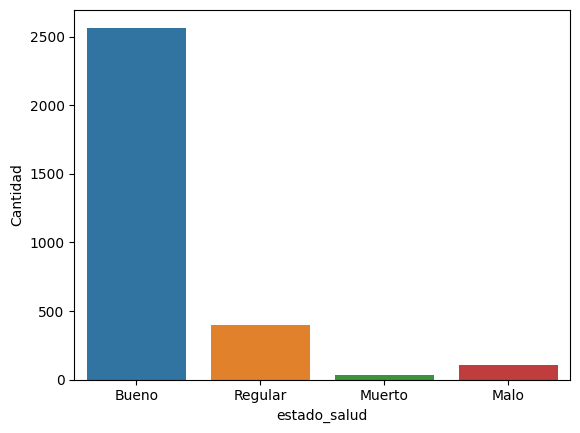

In [16]:
#Generación de gráfico de barras par observar la proporcón
plt.figure()
sns.countplot(arbolado,x='estado_salud', hue='estado_salud')
plt.ylabel('Cantidad')
#plt.savefig(save_path + 'salud.png', bbox_inches='tight')

In [17]:
#calculo el porcentaje en funcion del estado de salud bueno
porcentajeBueno = arbolado[arbolado['estado_salud'] == 'Bueno'].shape[0]  / arbolado['id_seguimiento'].count() * 100
porcentajeBueno

82.69974226804123

# Análisis de relaciones entre Variables

In [20]:
#Selecciono las columnas con las que me interesa correlacionar a la varible estado_salud
columnas_relevantes = ['estado_salud', 'fuste', 'tipo_cazoleta',
                       'ahuecamiento', 'inclinacion', 'altura', 'fase_vital', 'riesgo',
                       'levantamiento_vereda', 'tipo_tierra', 'tipo_calle', 'luz_led',
                       'tipo_vereda',  'especie', 'tipo_tendido', 'distancia_entre_ar', 'distancia_al_muro']


arbolado_relevante = arbolado[columnas_relevantes]
estadisticas_por_estado = arbolado_relevante.groupby('estado_salud').describe()


In [22]:
# Análisis de CrossTab
frecuencia_categoricas = {}
for col in columnas_relevantes:
    frecuencia_categoricas[col] = pd.crosstab(arbolado_relevante[col], arbolado_relevante['estado_salud'])

for col, tabla in frecuencia_categoricas.items():
    print(f'\nFrecuencia de {col} por estado de salud:\n', tabla)


Frecuencia de estado_salud por estado de salud:
 estado_salud  Bueno  Malo  Muerto  Regular
estado_salud                              
Bueno          2567     0       0        0
Malo              0   105       0        0
Muerto            0     0      31        0
Regular           0     0       0      401

Frecuencia de fuste por estado de salud:
 estado_salud         Bueno  Malo  Muerto  Regular
fuste                                            
Entre 0.10 y 0.40 m   2509   105      31      400
Mayor a 0.8 m            2     0       0        1
Menor a 0.10 m          56     0       0        0

Frecuencia de tipo_cazoleta por estado de salud:
 estado_salud    Bueno  Malo  Muerto  Regular
tipo_cazoleta                               
Chica             735    28      14      131
Grande            228     6       3       27
Mediana           340    21       1       55
Nivel del Piso    375    27       5       53
Sin Cazoleta      617    14       6      100
Sobre nivel       272     9      

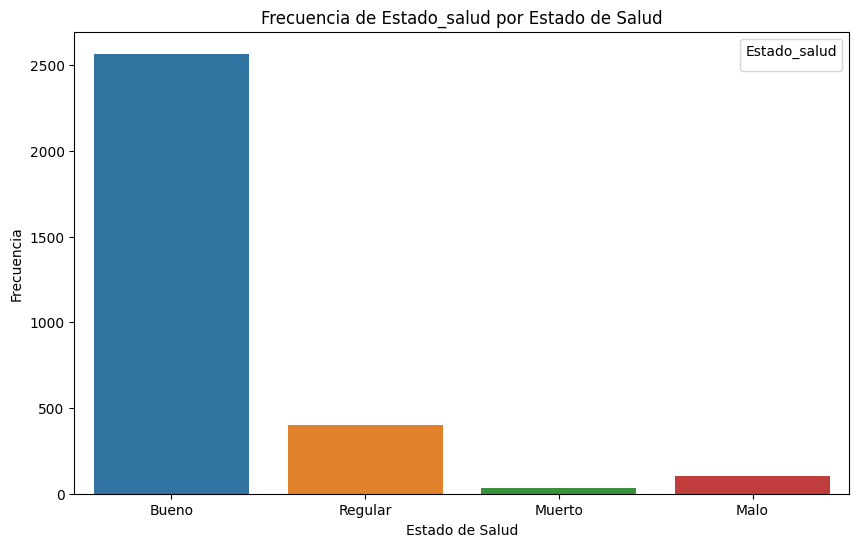

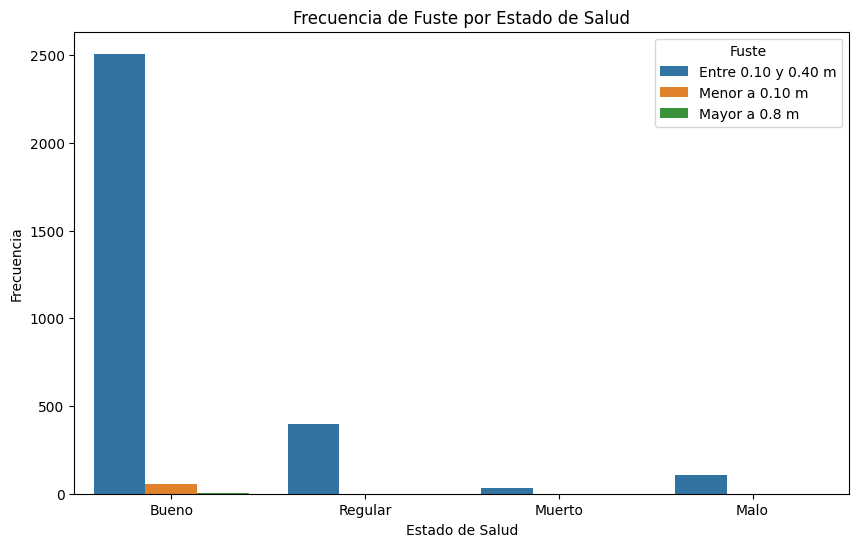

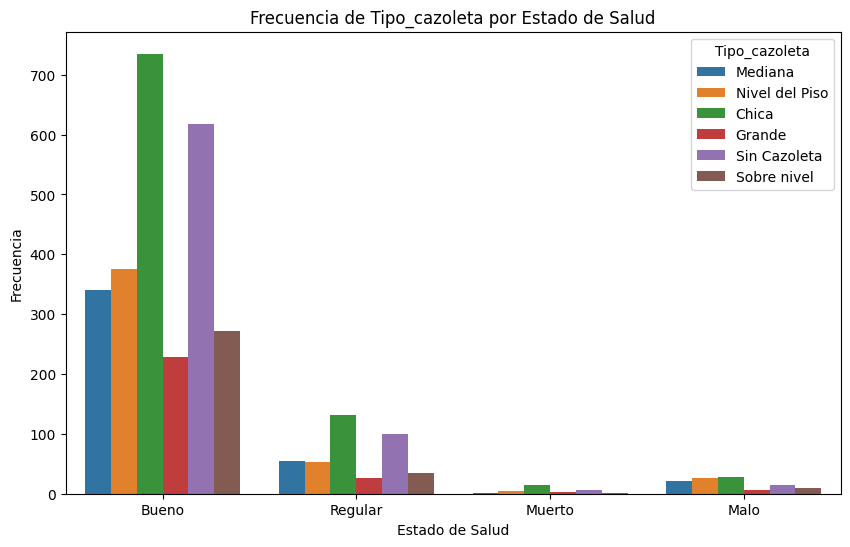

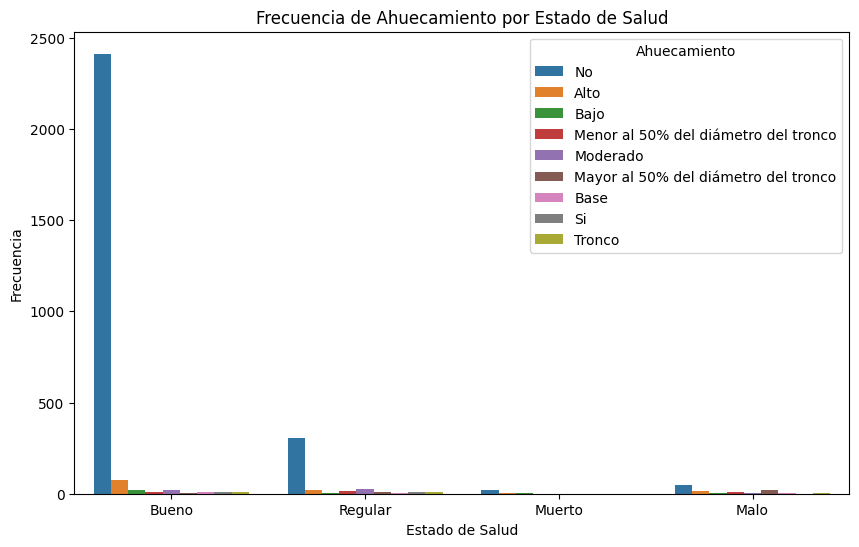

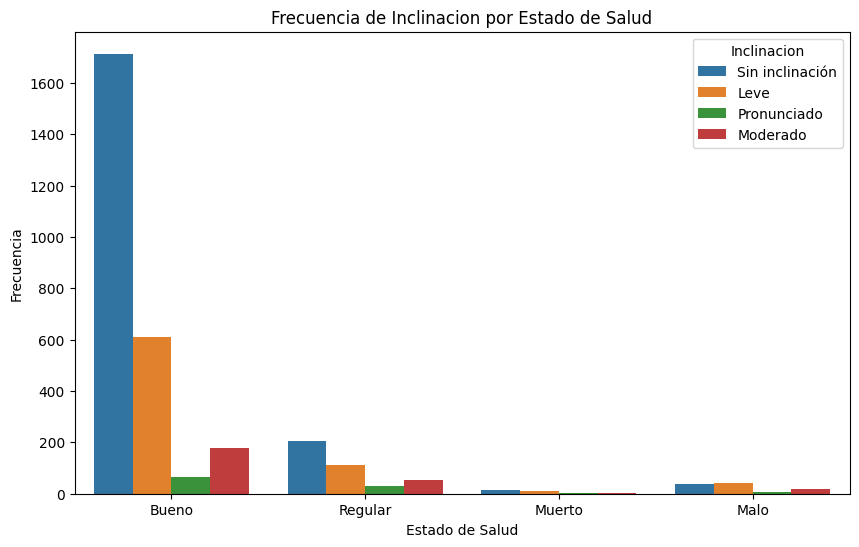

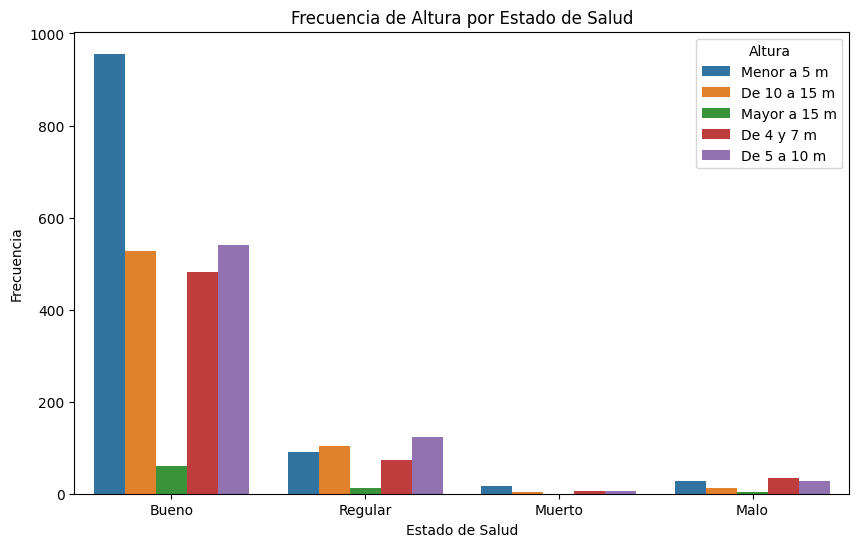

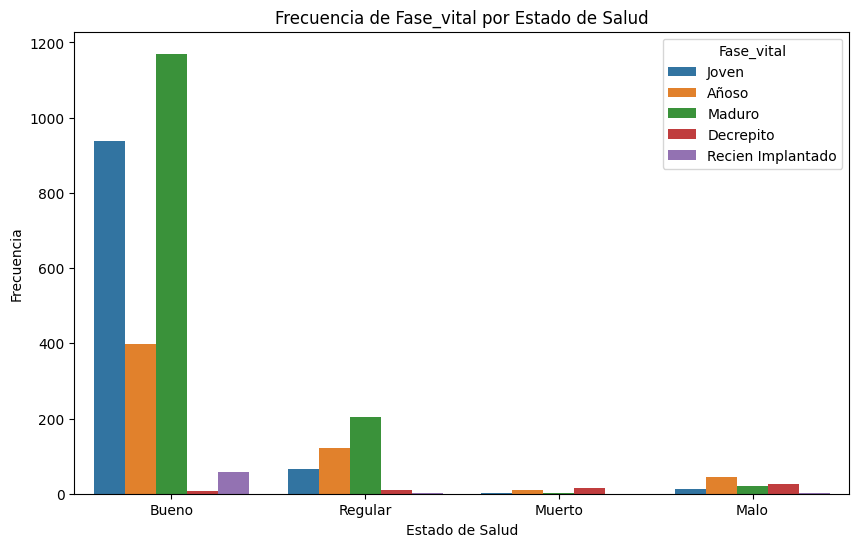

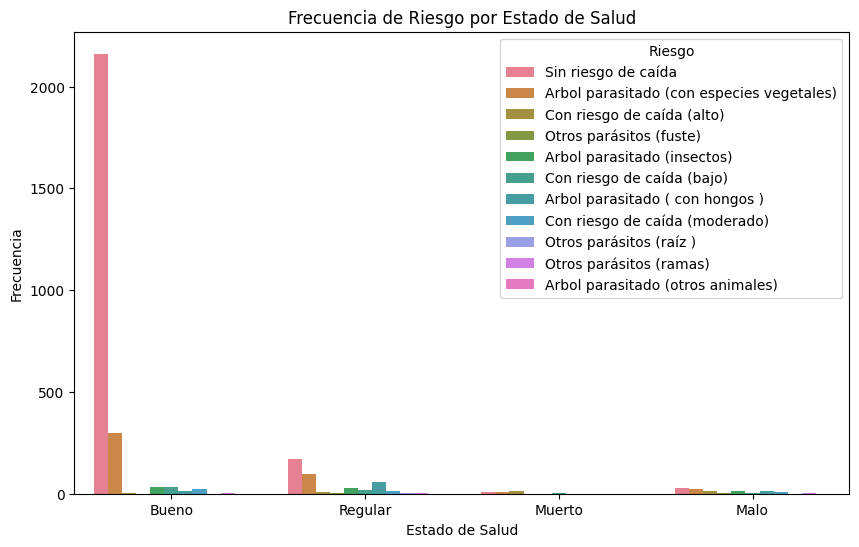

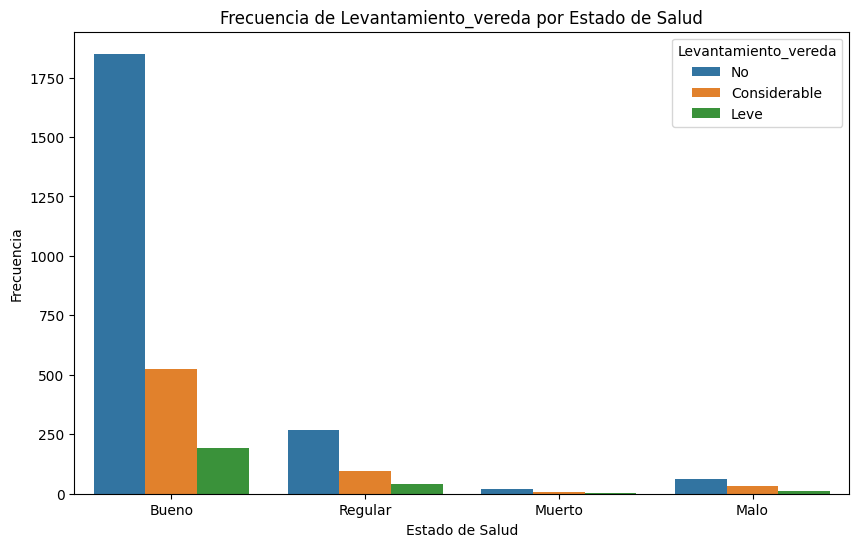

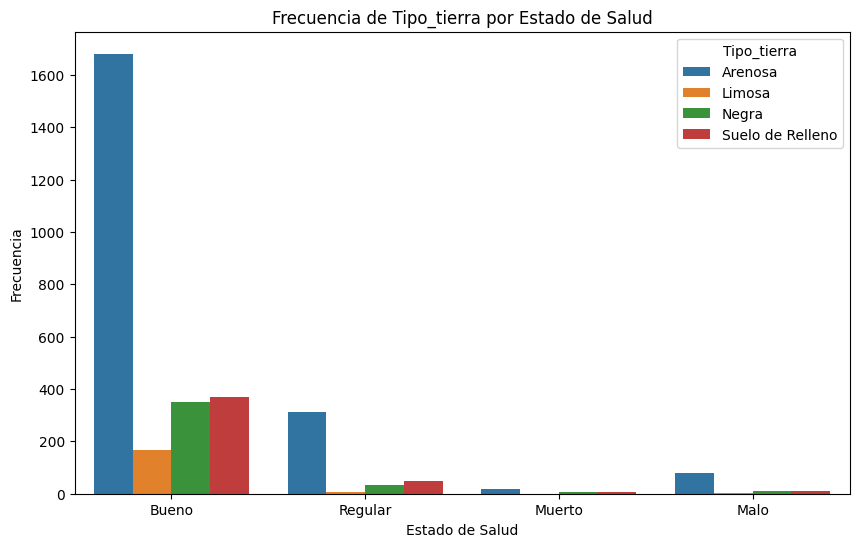

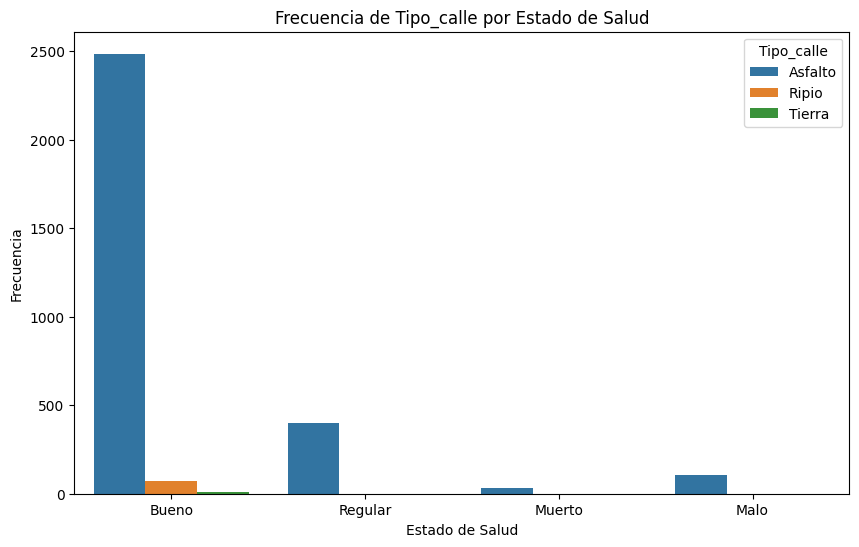

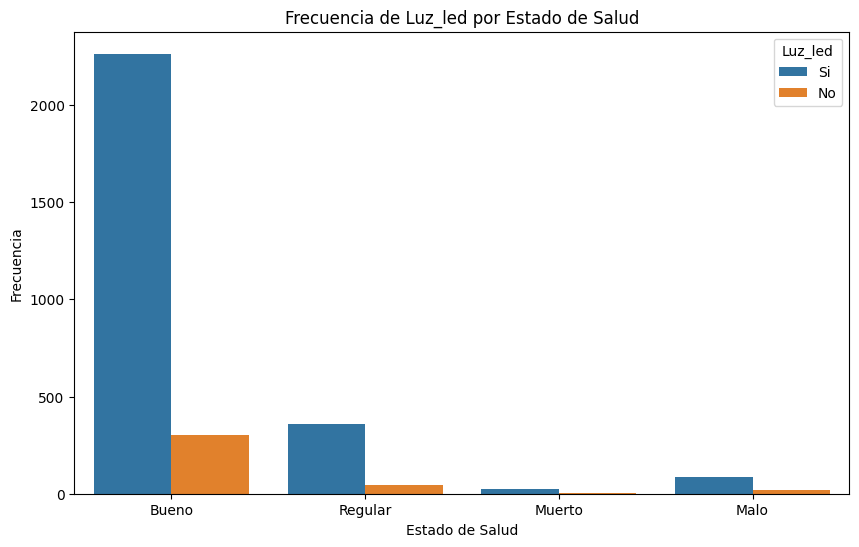

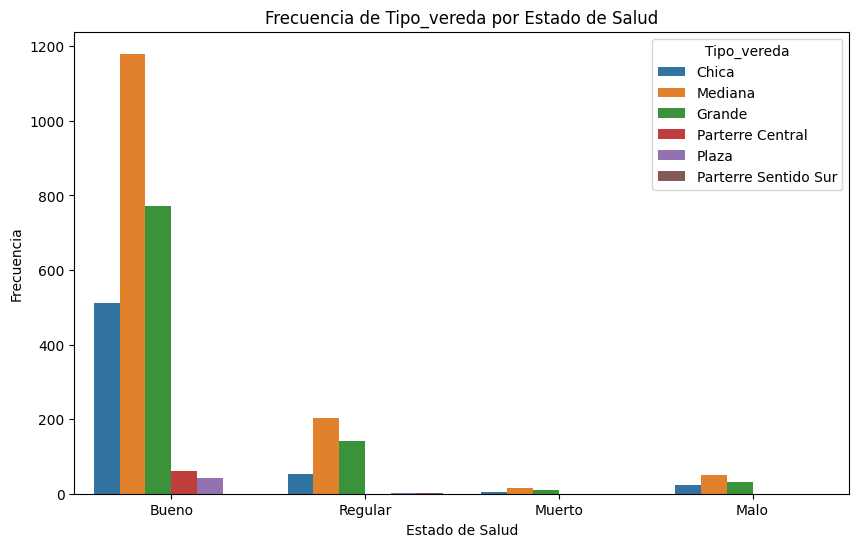

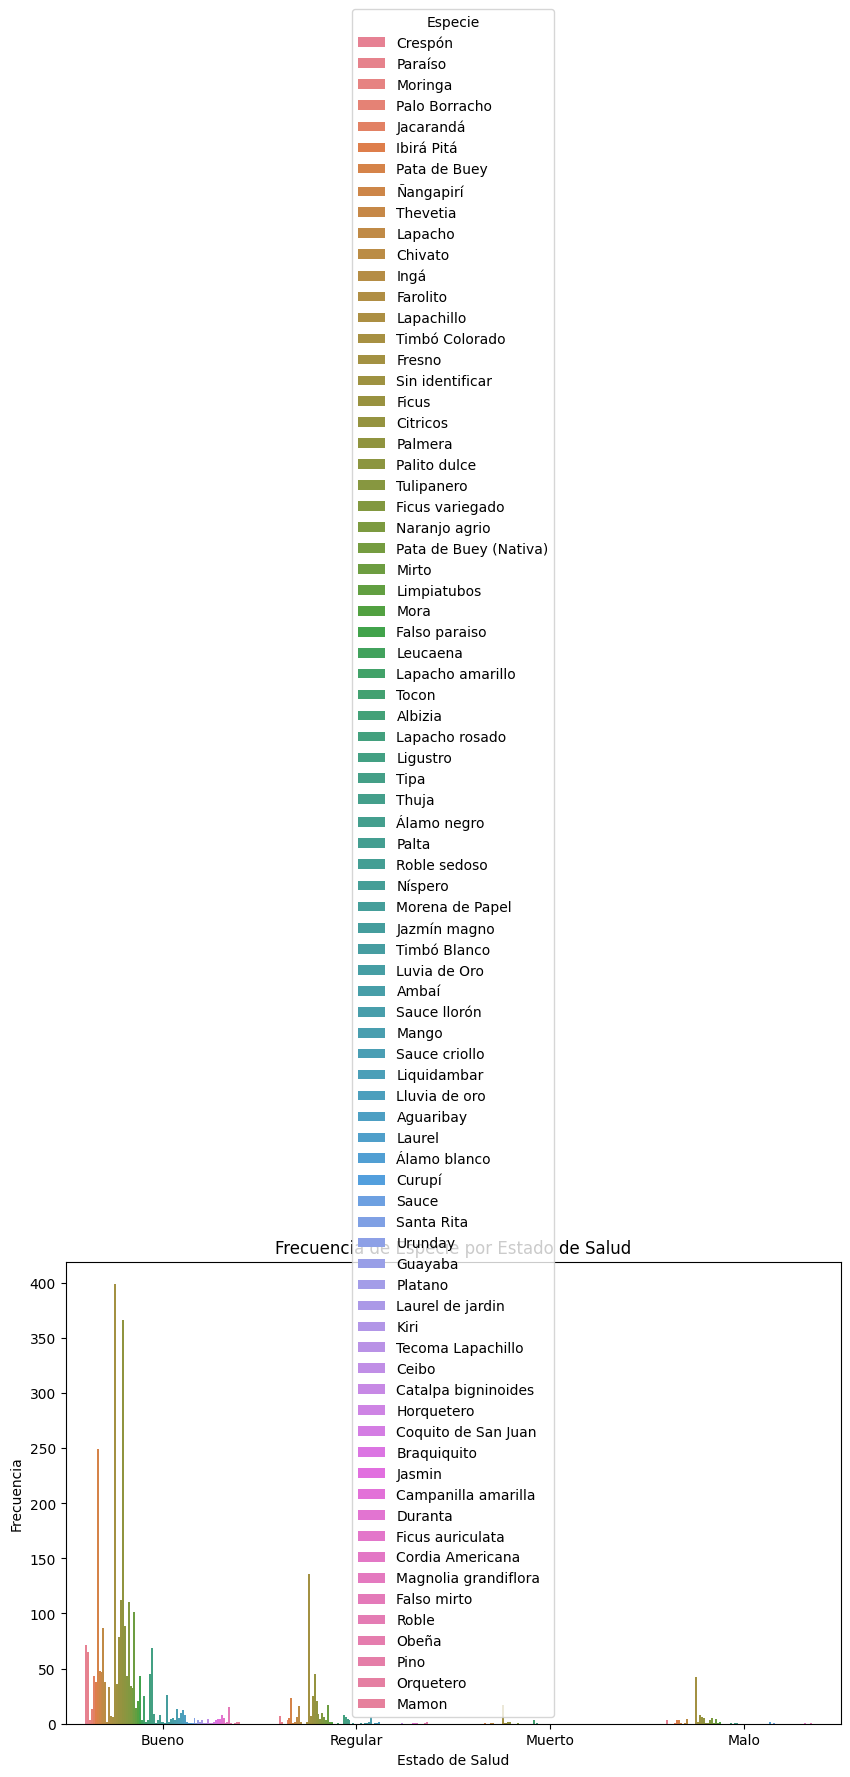

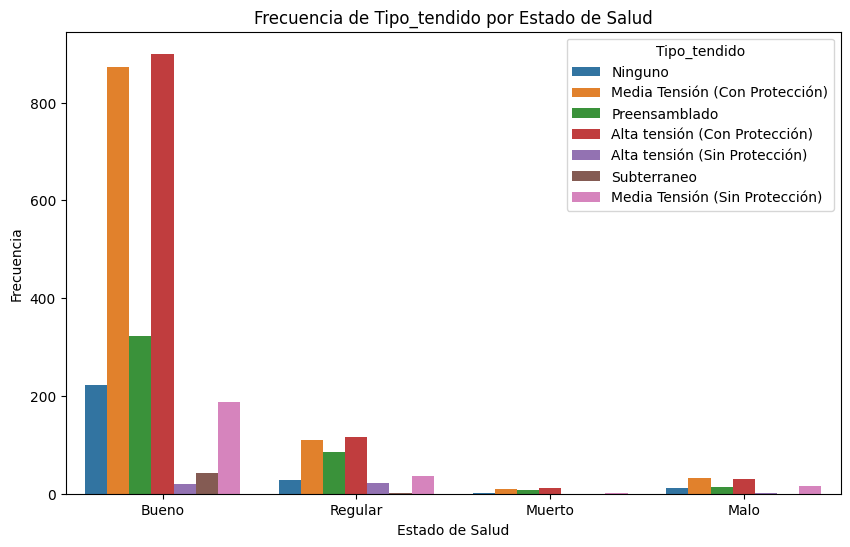

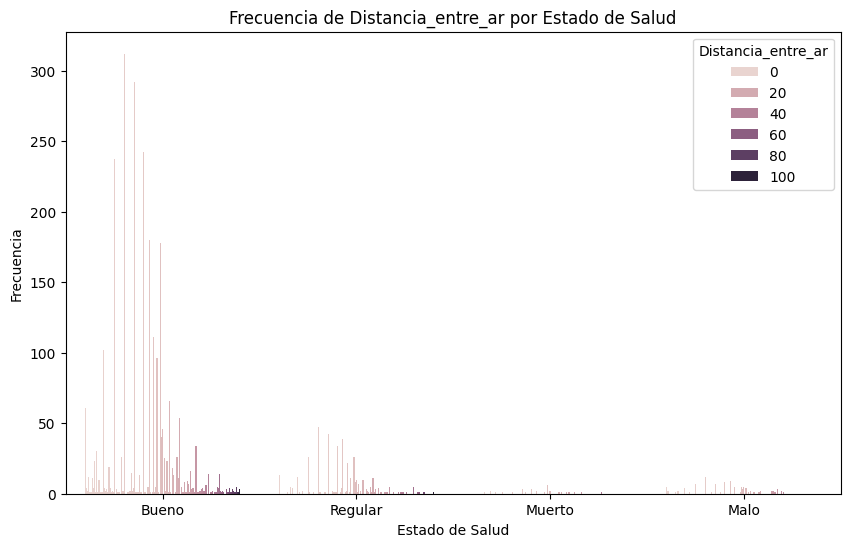

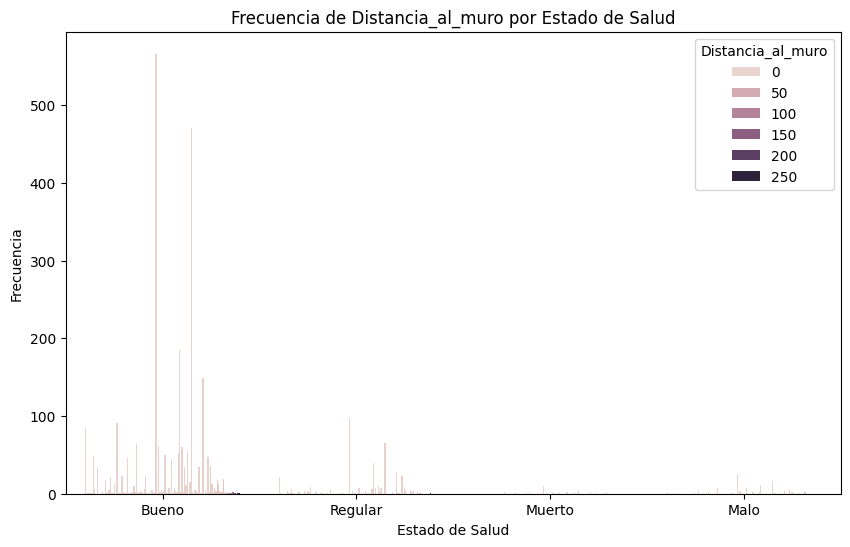

In [23]:
#genero un bucle para generar todos los gráficos
for col in columnas_relevantes:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=arbolado_relevante, x='estado_salud', hue=col)
    plt.xlabel('Estado de Salud')
    plt.ylabel('Frecuencia')
    plt.title(f'Frecuencia de {col.capitalize()} por Estado de Salud')
    plt.legend(title=col.capitalize())


# Gráficos ilustrativos de las variables

Text(0.5, 0, 'Cantidad')

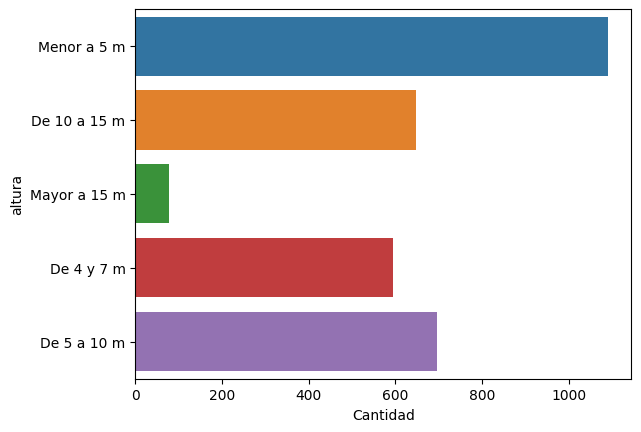

In [24]:
plt.figure()
sns.countplot(arbolado_relevante, y='altura', hue='altura')
plt.xlabel('Cantidad')


In [25]:
porcentajeAltura = arbolado_relevante[arbolado_relevante['altura'] == 'Menor a 5 m'].shape[0]  / arbolado.id_seguimiento.count() * 100
porcentajeAltura

35.115979381443296

In [26]:
print(arbolado_relevante['especie'].nunique())

80


In [27]:
arbolado_relevante

,estado_salud,fuste,tipo_cazoleta,ahuecamiento,inclinacion,altura,fase_vital,riesgo,levantamiento_vereda,tipo_tierra,tipo_calle,luz_led,tipo_vereda,especie,tipo_tendido,distancia_entre_ar,distancia_al_muro
0,Bueno,Entre 0.10 y 0.40 m,Mediana,No,Sin inclinación,Menor a 5 m,Joven,Sin riesgo de caída,No,Arenosa,Asfalto,Si,Chica,Crespón,Ninguno,5.0,1.0
1,Bueno,Menor a 0.10 m,Nivel del Piso,No,Sin inclinación,Menor a 5 m,Joven,Sin riesgo de caída,Considerable,Arenosa,Asfalto,Si,Chica,Crespón,Ninguno,5.0,1.0
2,Bueno,Menor a 0.10 m,Chica,No,Sin inclinación,Menor a 5 m,Joven,Sin riesgo de caída,No,Limosa,Asfalto,Si,Mediana,Paraíso,Media Tensión (Con Protección),5.0,2.0
3,Bueno,Entre 0.10 y 0.40 m,Mediana,No,Sin inclinación,Menor a 5 m,Joven,Sin riesgo de caída,Considerable,Arenosa,Asfalto,Si,Grande,Crespón,Preensamblado,3.0,1.0
4,Bueno,Menor a 0.10 m,Nivel del Piso,No,Sin inclinación,Menor a 5 m,Joven,Sin riesgo de caída,No,Arenosa,Asfalto,Si,Grande,Crespón,Preensamblado,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,Bueno,Entre 0.10 y 0.40 m,Chica,No,Sin inclinación,Menor a 5 m,Joven,Arbol parasitado (con especies vegetales),No,Arenosa,Asfalto,No,Grande,Pata de Buey,Media Tensión (Con Protección),25.0,2.5
3100,Regular,Entre 0.10 y 0.40 m,Chica,No,Leve,Menor a 5 m,Joven,Arbol parasitado (insectos),No,Arenosa,Asfalto,Si,Grande,Citricos,Media Tensión (Con Protección),100.0,2.5
3101,Bueno,Entre 0.10 y 0.40 m,Chica,No,Leve,De 5 a 10 m,Maduro,Sin riesgo de caída,Considerable,Arenosa,Asfalto,Si,Grande,Leucaena,Media Tensión (Con Protección),8.0,2.5
3102,Regular,Entre 0.10 y 0.40 m,Mediana,No,Sin inclinación,De 10 a 15 m,Maduro,Sin riesgo de caída,Considerable,Arenosa,Asfalto,Si,Grande,Fresno,Alta tensión (Con Protección),4.0,2.5


Text(0, 0.5, 'Cantidad')

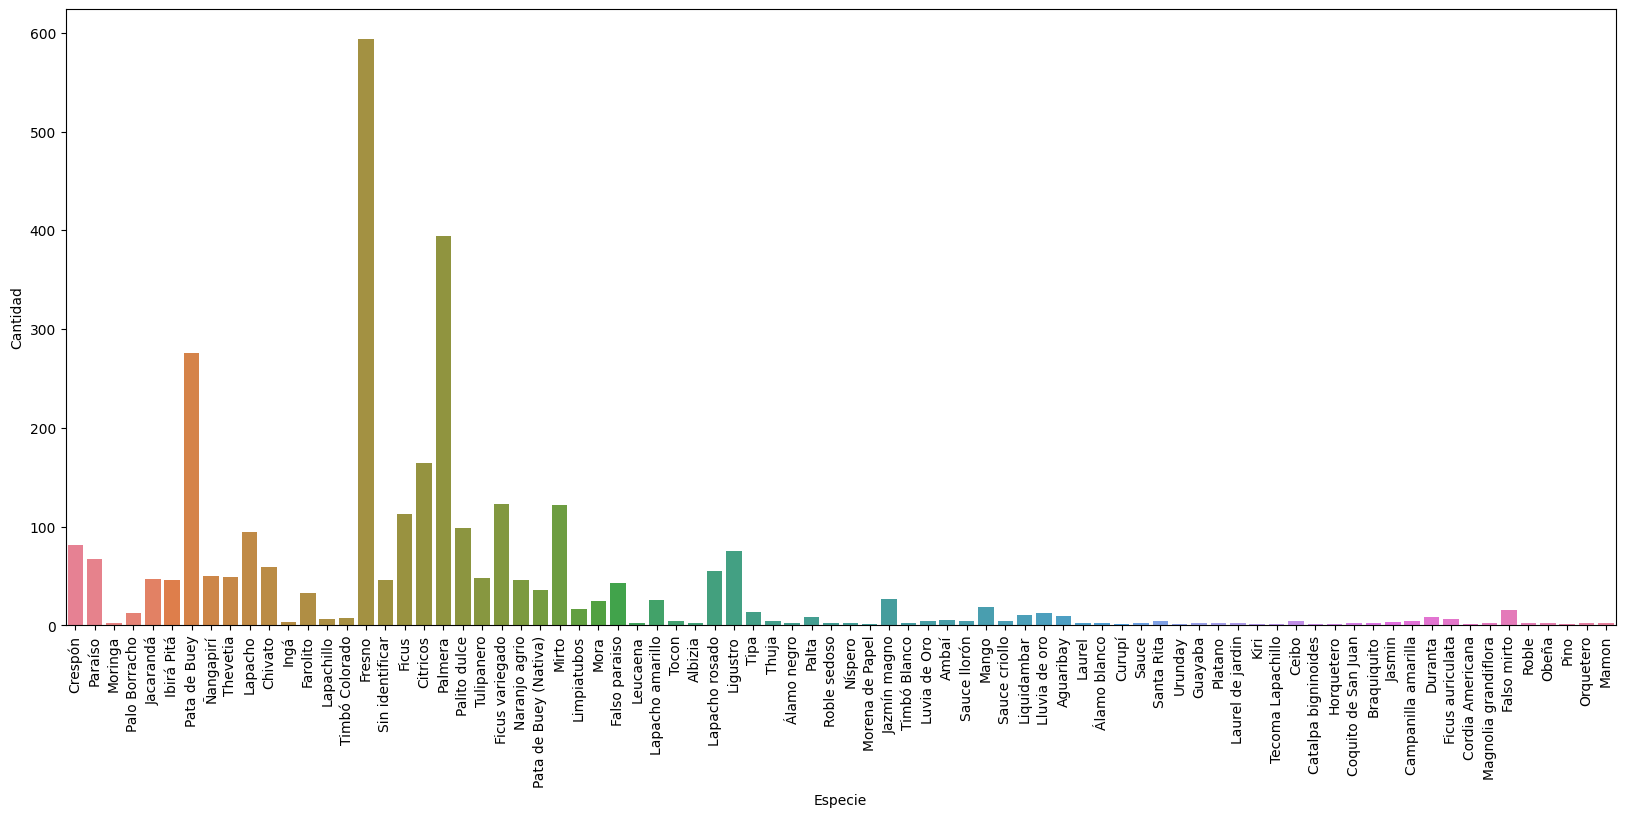

In [28]:
plt.figure(figsize=(20, 8))
sns.countplot(arbolado_relevante,x='especie', hue='especie', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Especie')
plt.ylabel('Cantidad')


In [ ]:
frecuencia_especies = arbolado_relevante['especie'].value_counts()

4570
Las 10 especies más comunes representan 63.89821029082774 de los árboles totales


Text(0.5, 1.0, 'Top 10 Especies de Árboles')

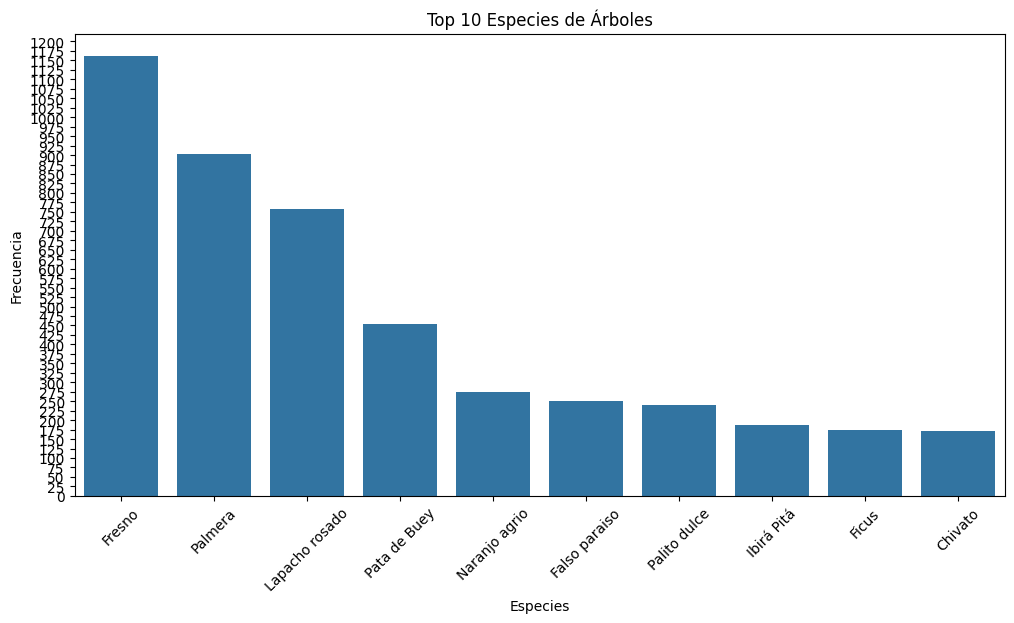

In [ ]:
especies_mas_comunes = frecuencia_especies.head(10)
print(especies_mas_comunes.sum())
print(f"Las 10 especies más comunes representan {(especies_mas_comunes.sum()/arbolado_relevante['especie'].count())*100} de los árboles totales")

plt.figure(figsize=(12, 6))
sns.barplot(x=especies_mas_comunes.index, y=especies_mas_comunes.values)
plt.xticks(rotation=45)
plt.yticks(range(0, frecuencia_especies.max() + 50, 25))
plt.xlabel('Especies')
plt.ylabel('Frecuencia')
plt.title('Top 10 Especies de Árboles')


# Filtrado del data Set Original


In [30]:
#creo un nuevo dataset quitando el estado de salud buena del Dataset Original a fin de obsarvar mejor la incidencia con respectoa las otras varibles
arboladoSaludNegativa = arbolado_relevante[arbolado_relevante['estado_salud'] != 'Bueno']



In [31]:
totalSaludNegativa = arboladoSaludNegativa.count()
totalSaludNegativa


,0
estado_salud,537
fuste,537
tipo_cazoleta,537
ahuecamiento,537
inclinacion,537
altura,537
fase_vital,537
riesgo,537
levantamiento_vereda,537
tipo_tierra,537



Frecuencia de estado_salud por estado de salud:
 estado_salud  Malo  Muerto  Regular
estado_salud                       
Malo           105       0        0
Muerto           0      31        0
Regular          0       0      401

Frecuencia de fuste por estado de salud:
 estado_salud         Malo  Muerto  Regular
fuste                                     
Entre 0.10 y 0.40 m   105      31      400
Mayor a 0.8 m           0       0        1

Frecuencia de tipo_cazoleta por estado de salud:
 estado_salud    Malo  Muerto  Regular
tipo_cazoleta                        
Chica             28      14      131
Grande             6       3       27
Mediana           21       1       55
Nivel del Piso    27       5       53
Sin Cazoleta      14       6      100
Sobre nivel        9       2       35

Frecuencia de ahuecamiento por estado de salud:
 estado_salud                          Malo  Muerto  Regular
ahuecamiento                                               
Alto                          

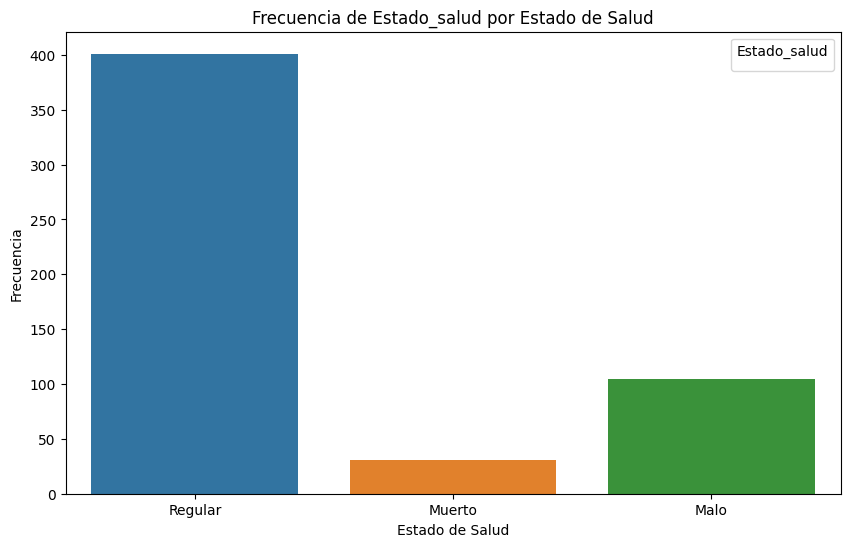

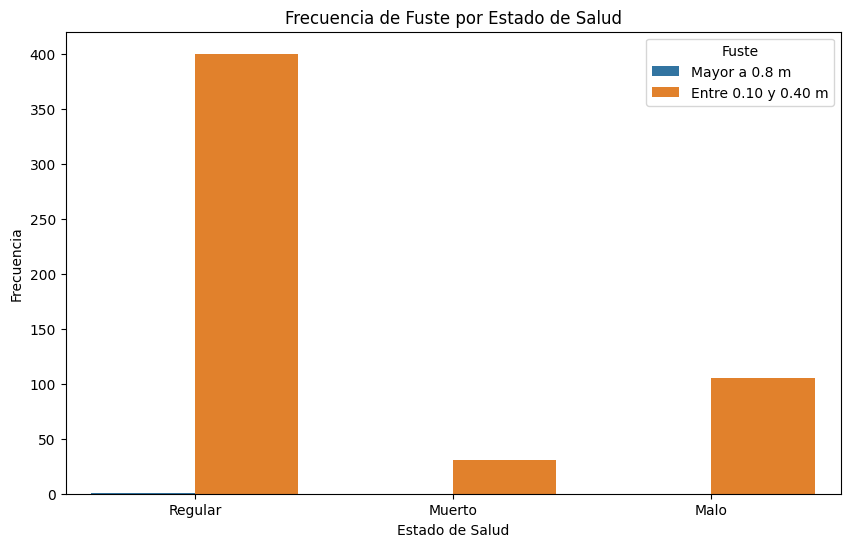

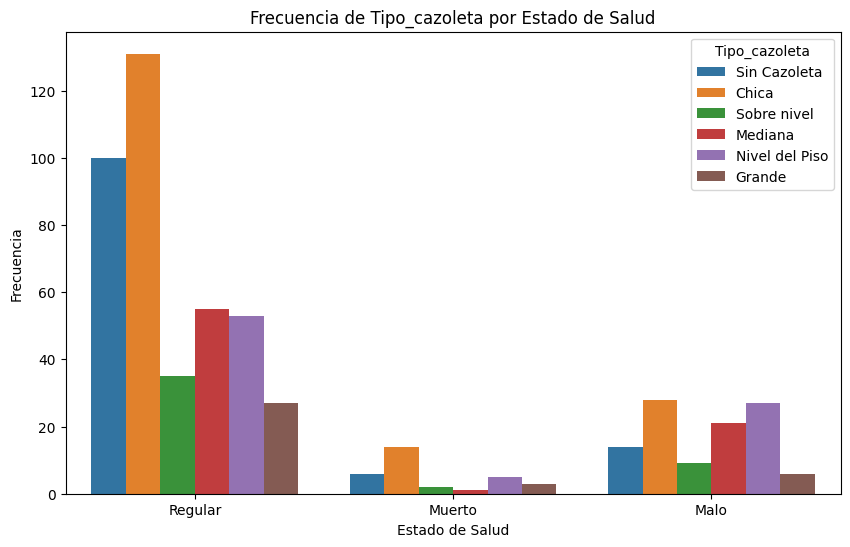

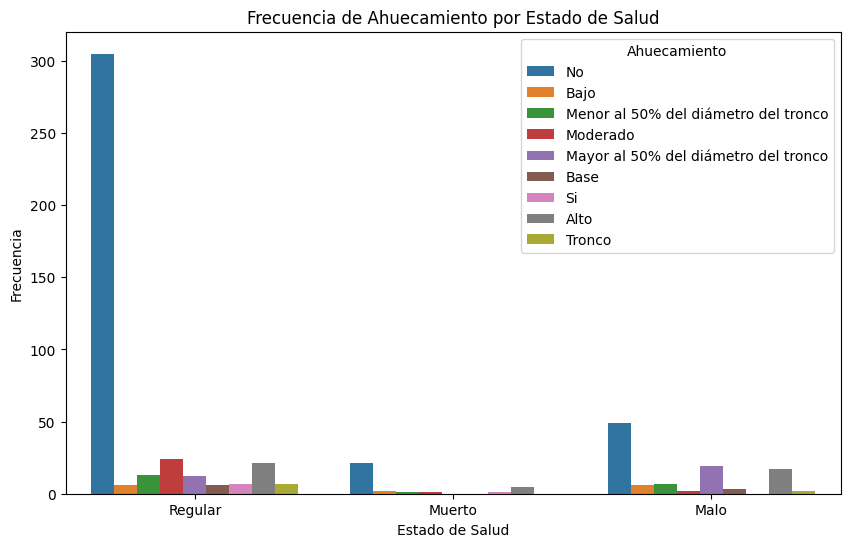

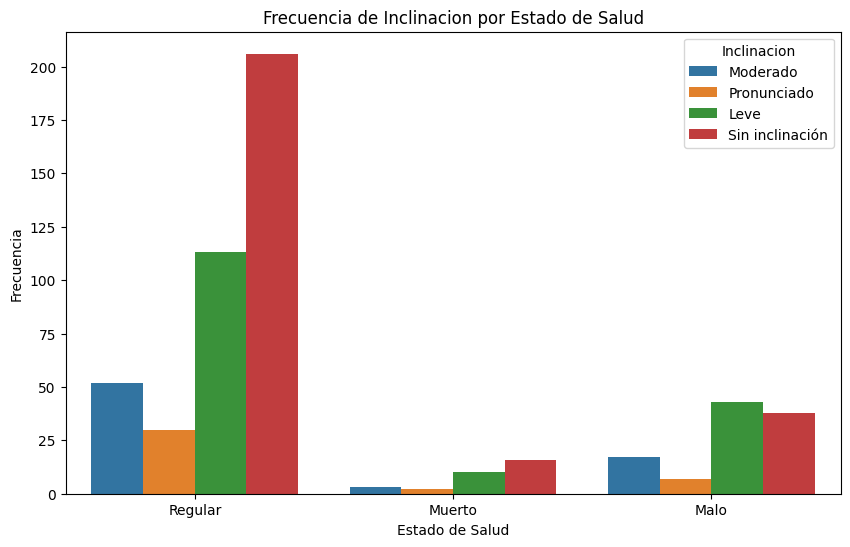

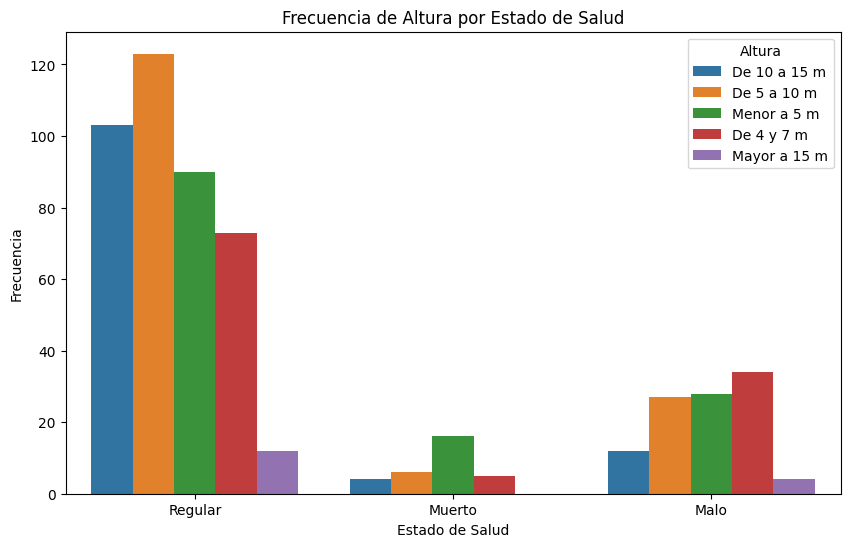

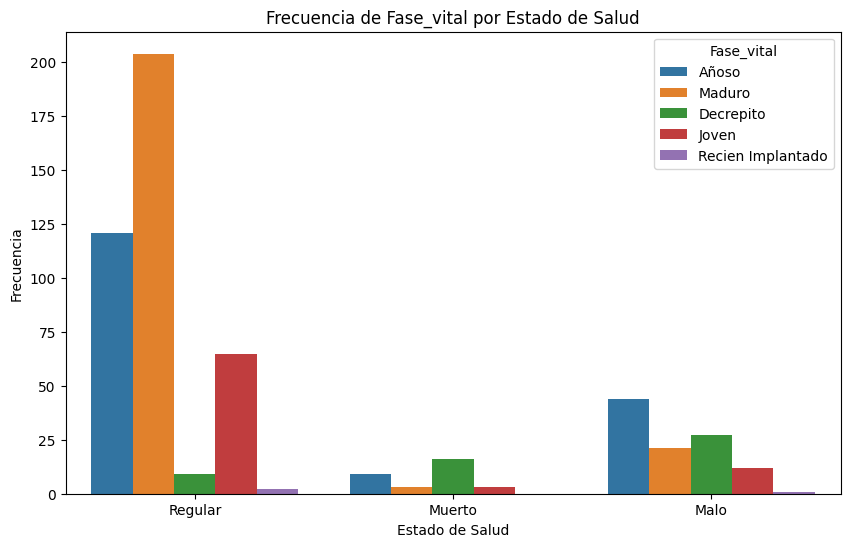

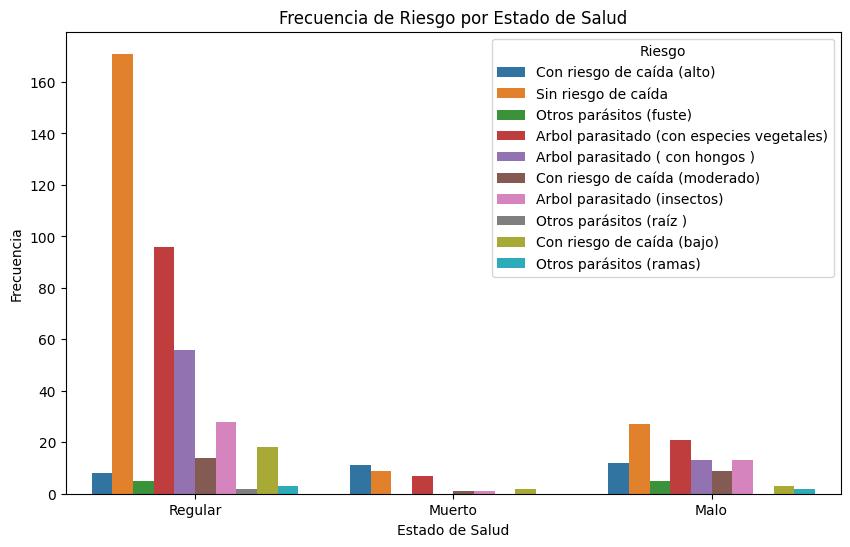

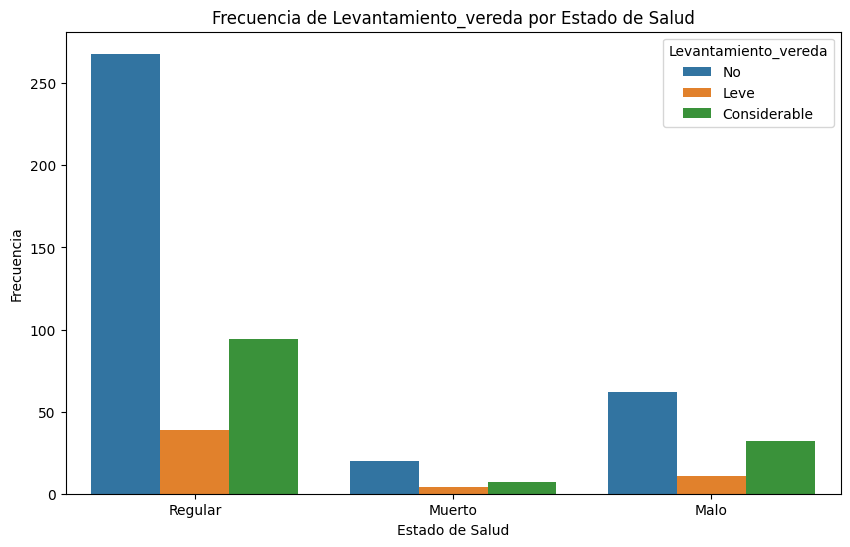

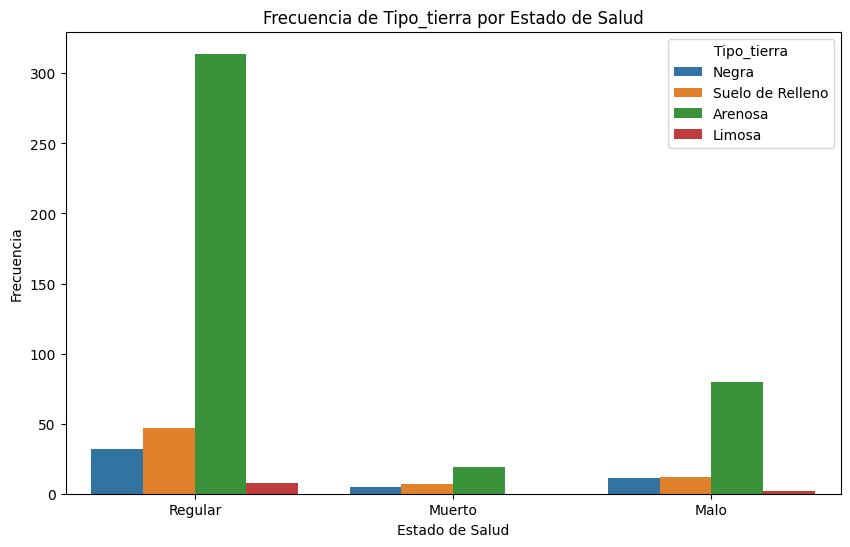

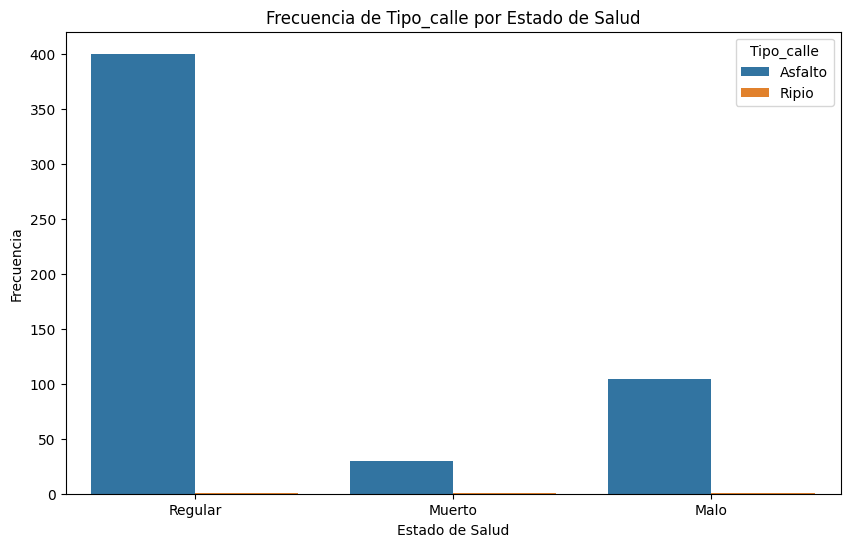

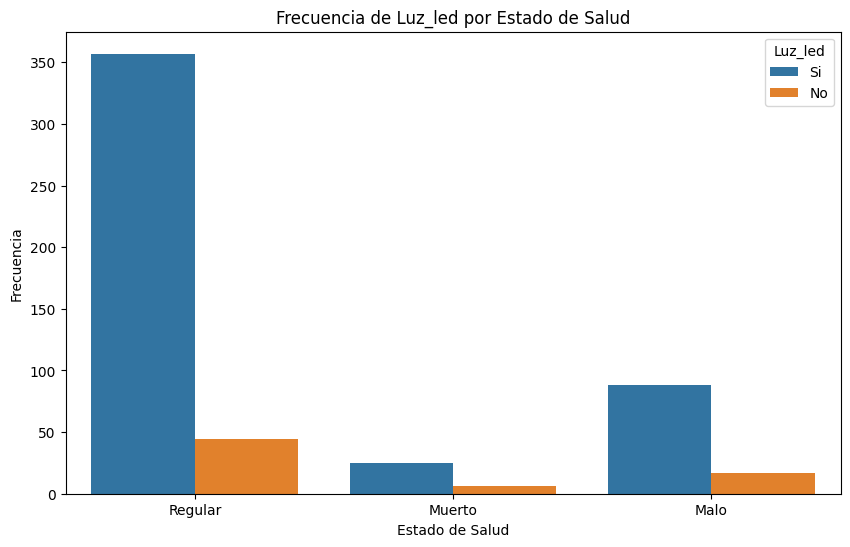

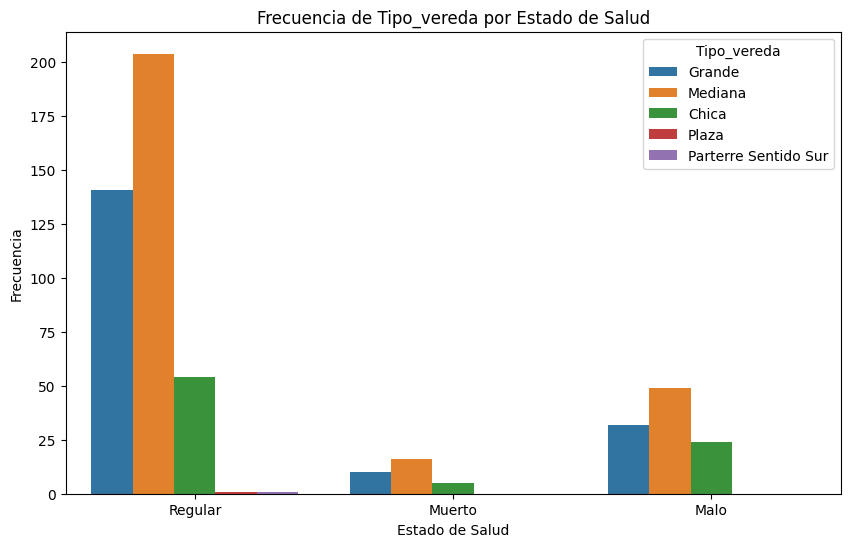

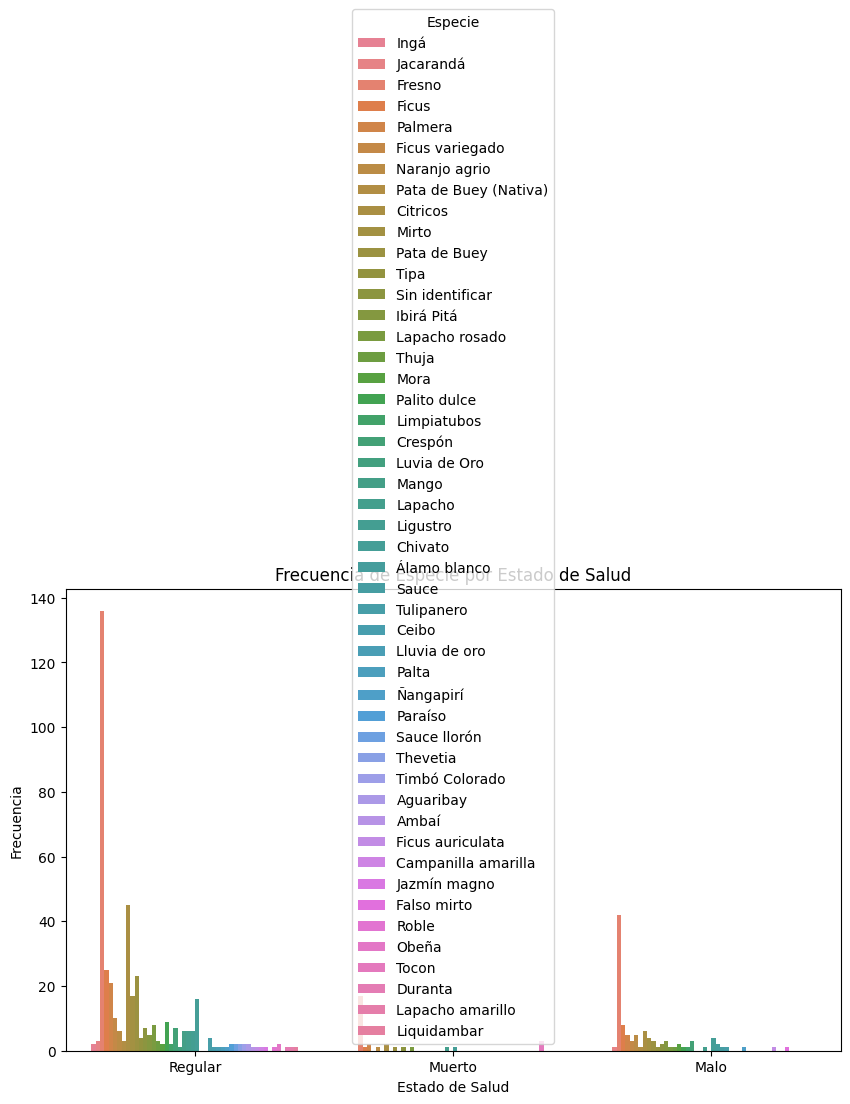

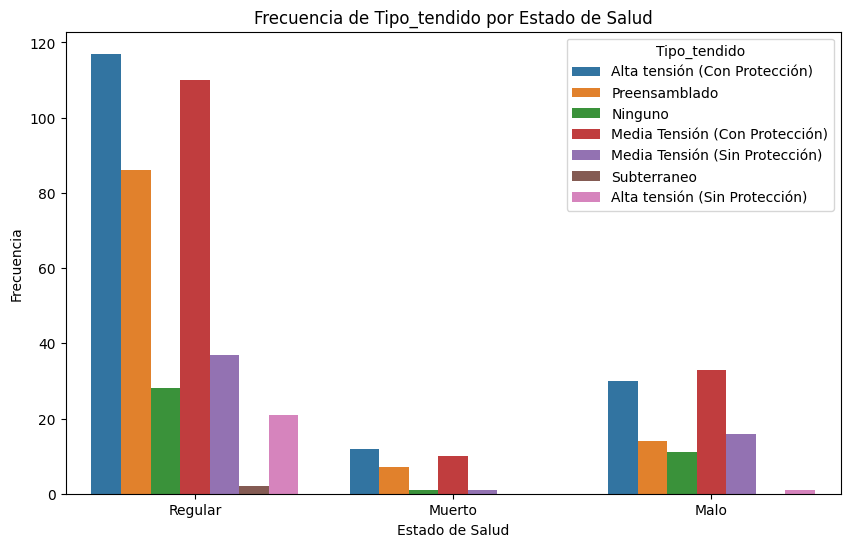

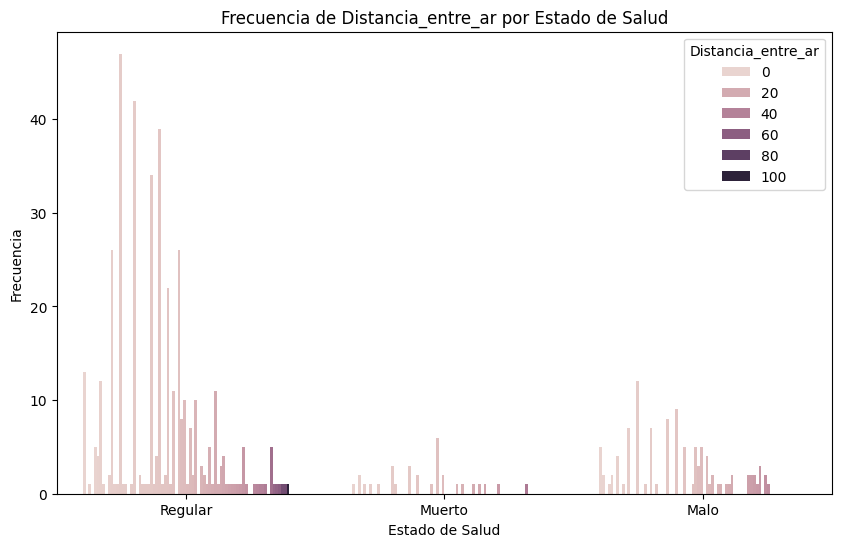

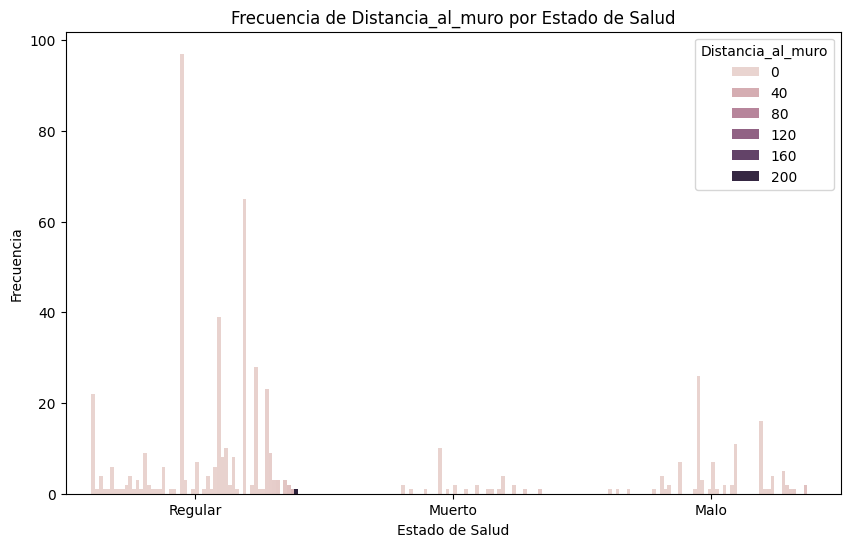

In [32]:
#Acá hago el mismo análisis pero sacando el estado de salud bueno


estadisticas_por_estado = arboladoSaludNegativa.groupby('estado_salud').describe()


frecuencia_categoricas = {}
for col in columnas_relevantes:
    frecuencia_categoricas[col] = pd.crosstab(arboladoSaludNegativa[col], arboladoSaludNegativa['estado_salud'])

for col, tabla in frecuencia_categoricas.items():
    print(f'\nFrecuencia de {col} por estado de salud:\n', tabla)


#genero un bucle para generar todos los gráficos
for col in columnas_relevantes:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=arboladoSaludNegativa, x='estado_salud', hue=col)
    plt.xlabel('Estado de Salud')
    plt.ylabel('Frecuencia')
    plt.title(f'Frecuencia de {col.capitalize()} por Estado de Salud')
    plt.legend(title=col.capitalize())


In [33]:
#Aplico un nuevo filtro eliminado los arboles que no tiene riesgo de caida
criterio2 = arboladoSaludNegativa['riesgo'] !='Sin riesgo de caída'
arboladoConRiesgo = arboladoSaludNegativa[criterio2]


Frecuencia de estado_salud por estado de salud:
 estado_salud  Malo  Muerto  Regular
estado_salud                       
Malo            78       0        0
Muerto           0      22        0
Regular          0       0      230

Frecuencia de fuste por estado de salud:
 estado_salud         Malo  Muerto  Regular
fuste                                     
Entre 0.10 y 0.40 m    78      22      229
Mayor a 0.8 m           0       0        1

Frecuencia de tipo_cazoleta por estado de salud:
 estado_salud    Malo  Muerto  Regular
tipo_cazoleta                        
Chica             21      11       88
Grande             4       2       15
Mediana           15       1       26
Nivel del Piso    21       3       38
Sin Cazoleta      11       4       43
Sobre nivel        6       1       20

Frecuencia de ahuecamiento por estado de salud:
 estado_salud                          Malo  Muerto  Regular
ahuecamiento                                               
Alto                          

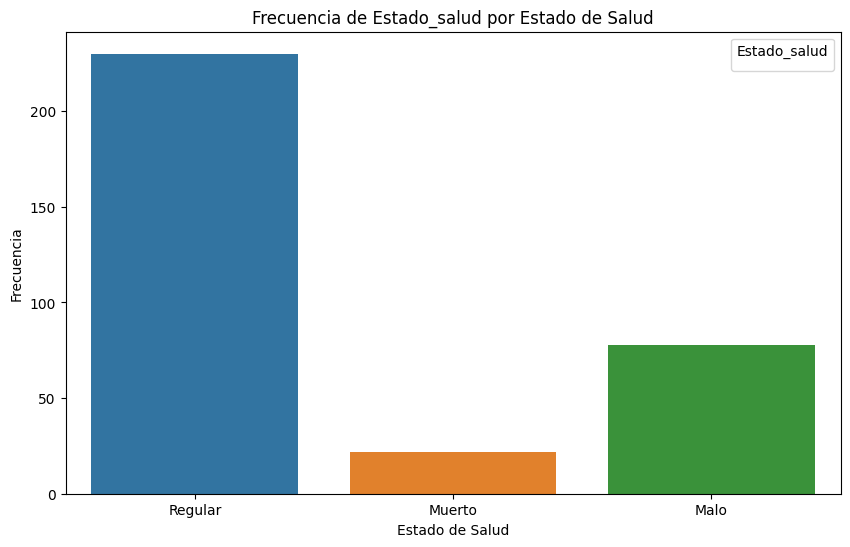

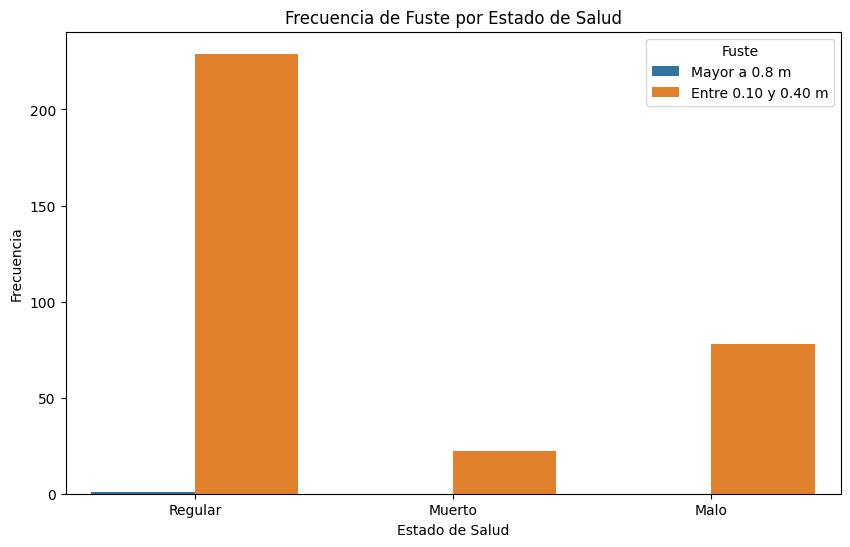

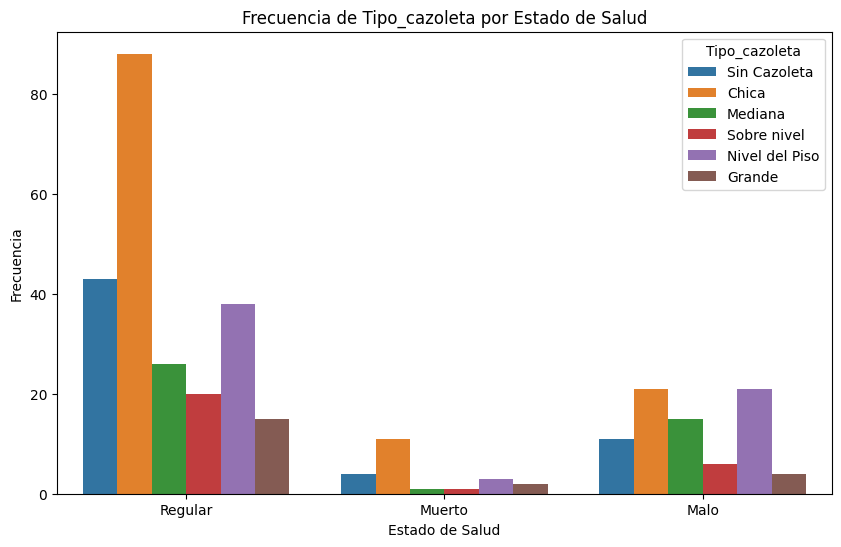

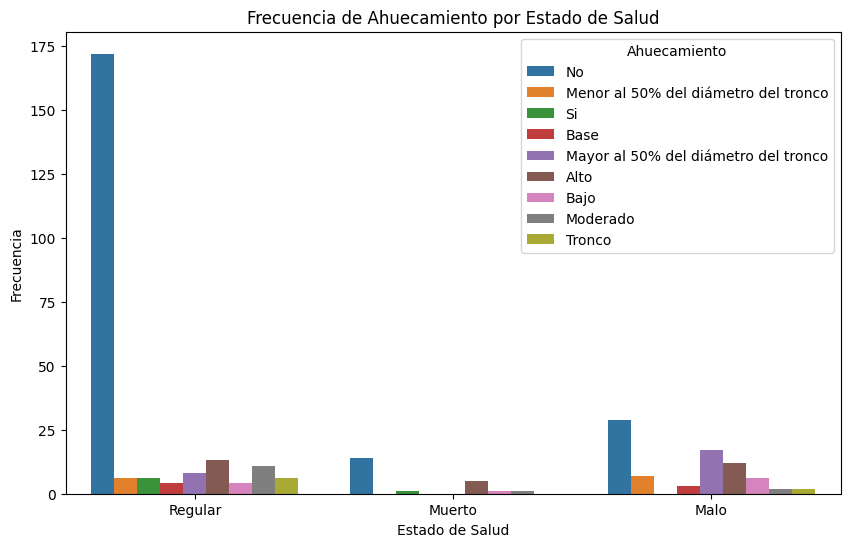

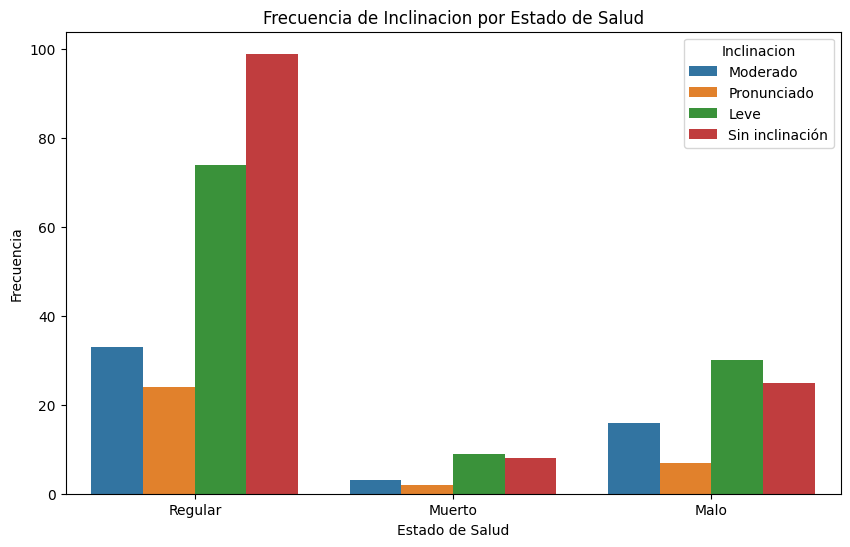

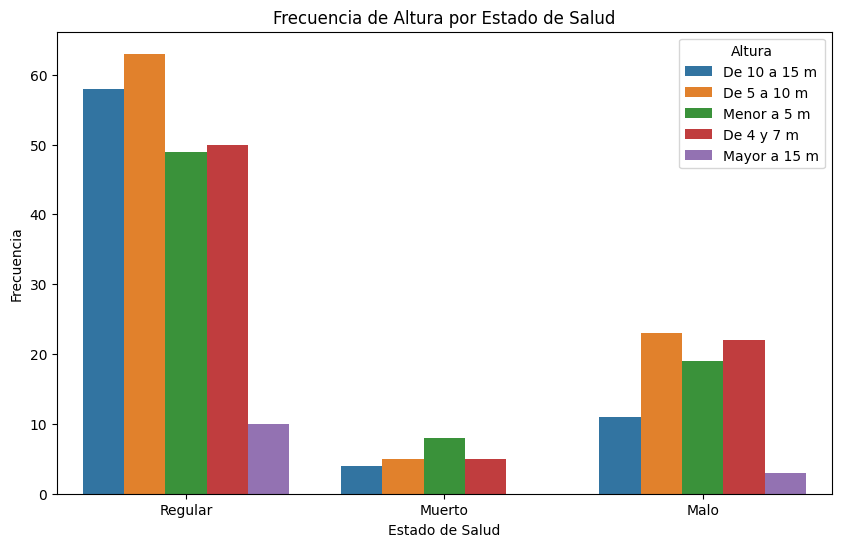

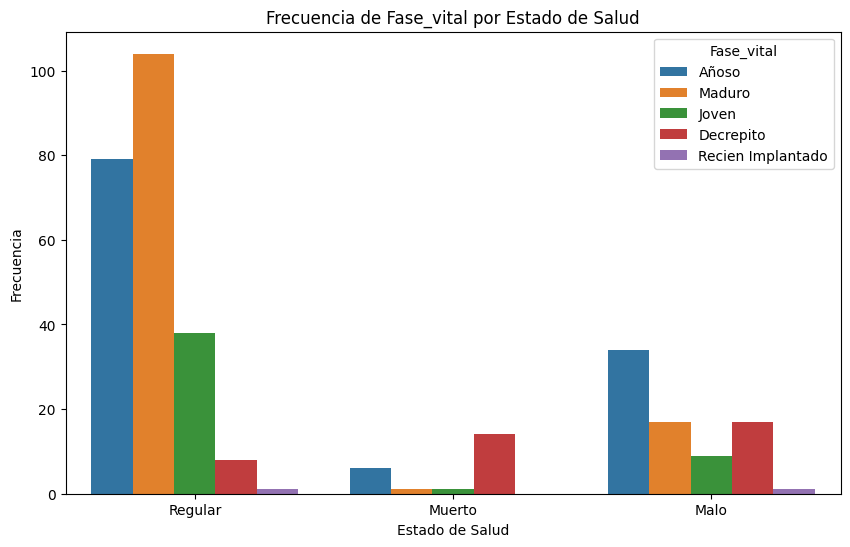

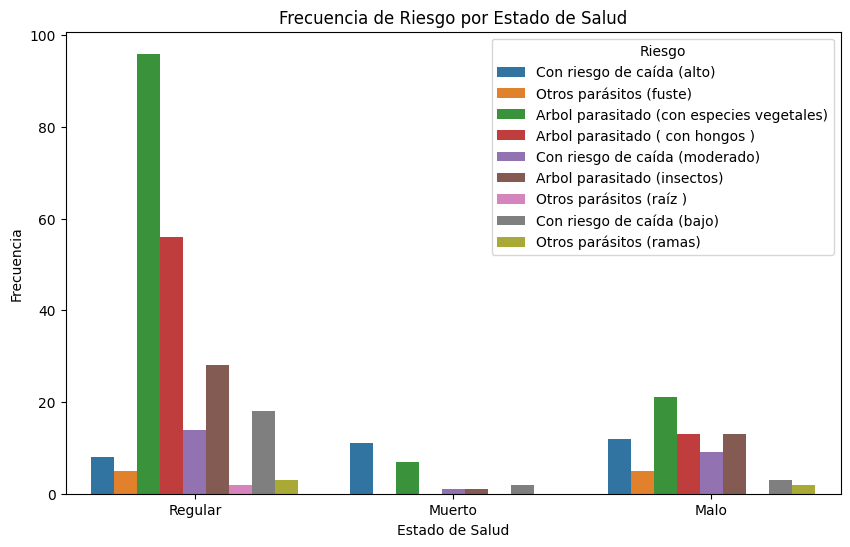

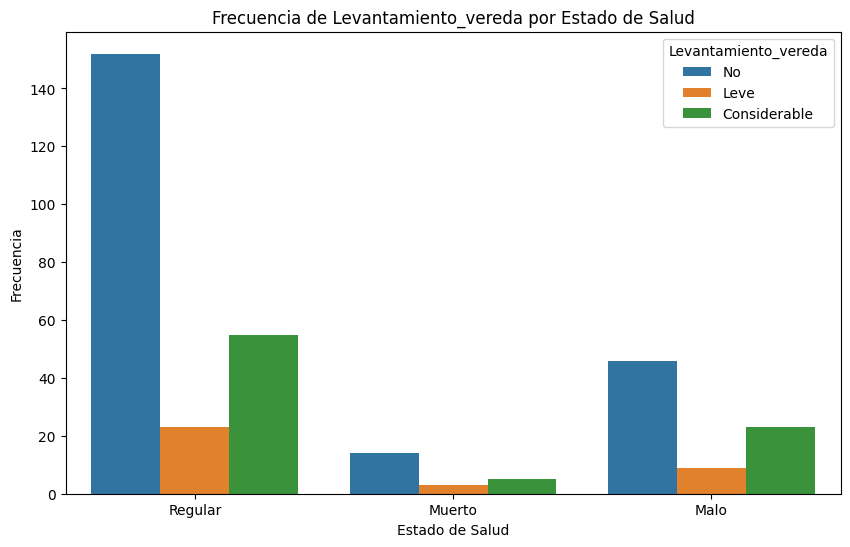

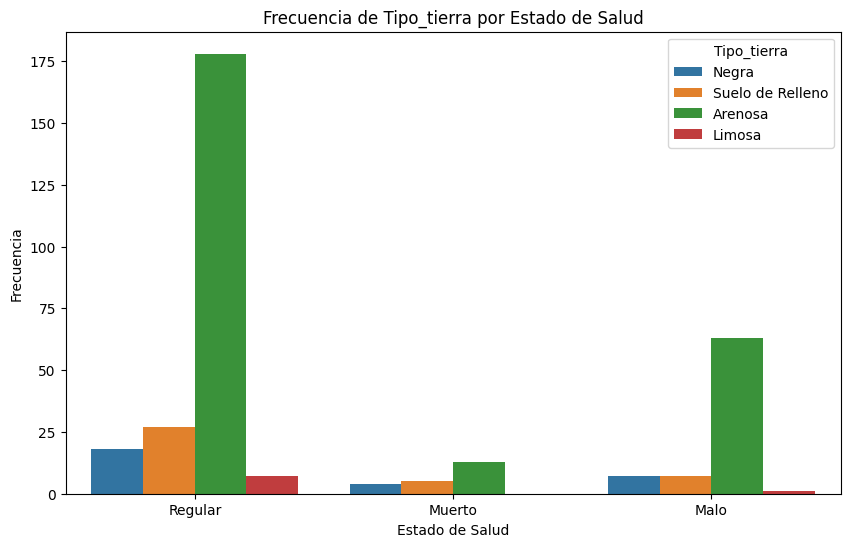

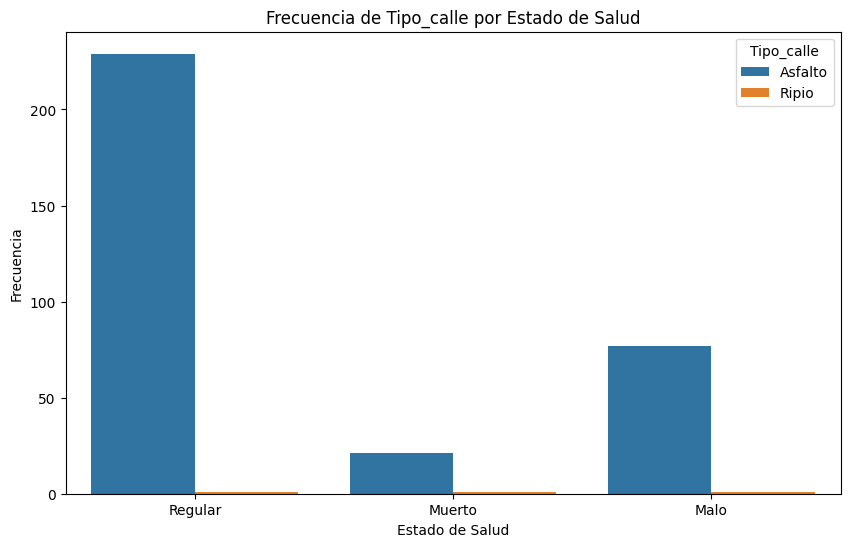

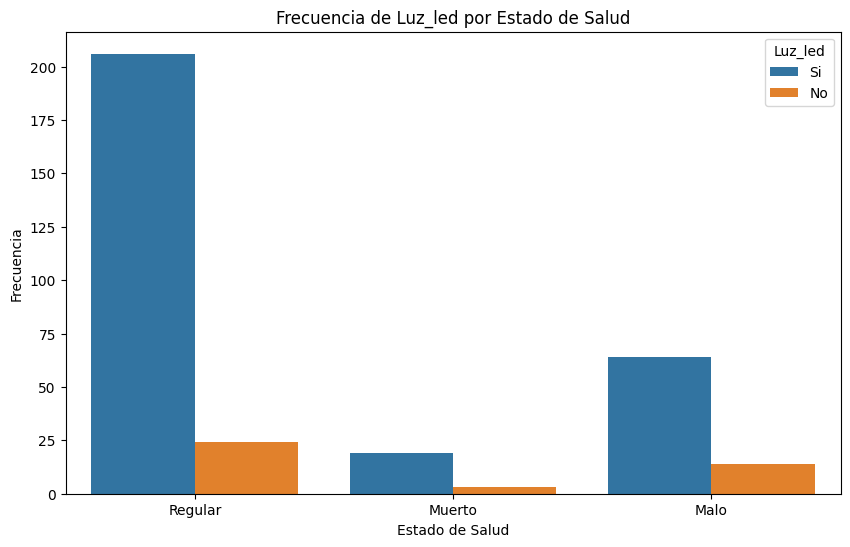

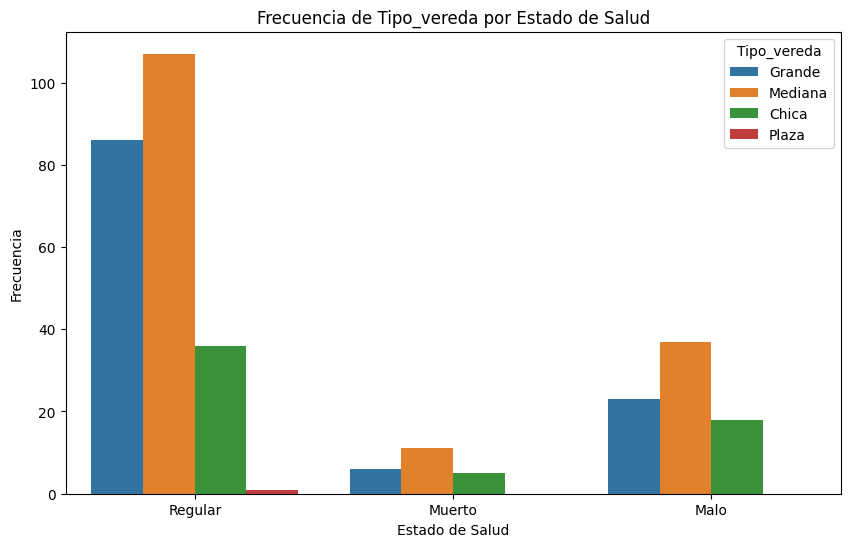

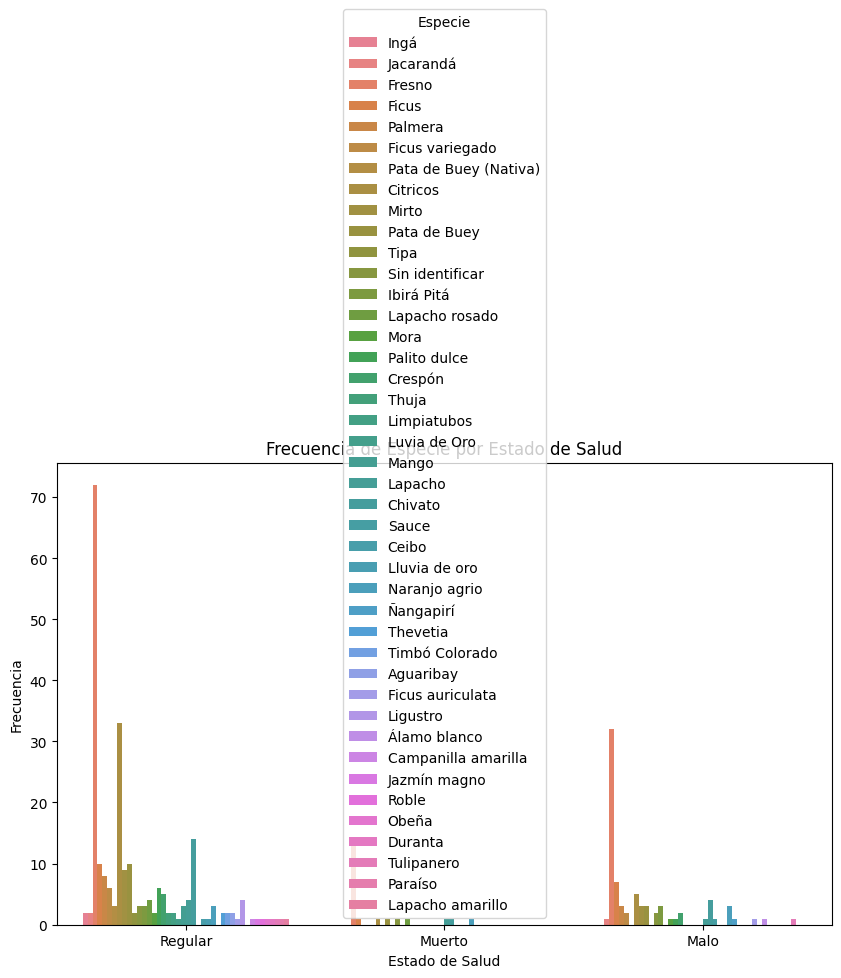

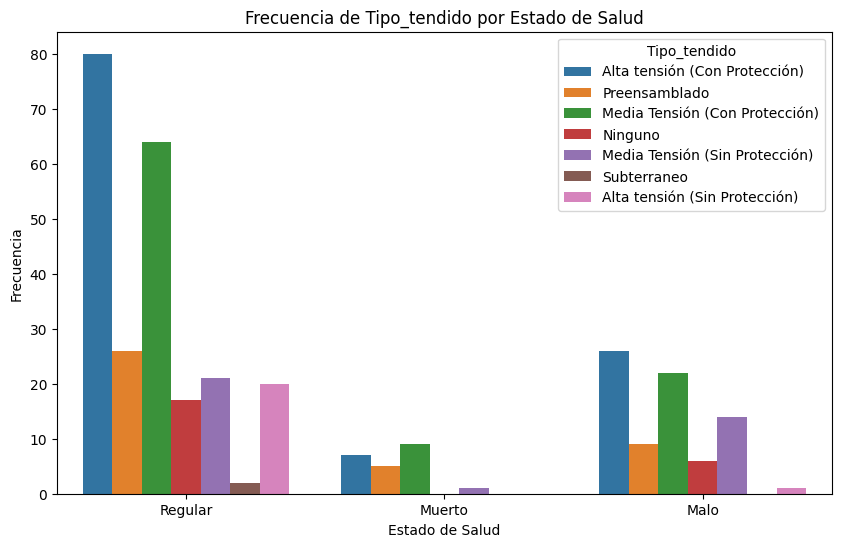

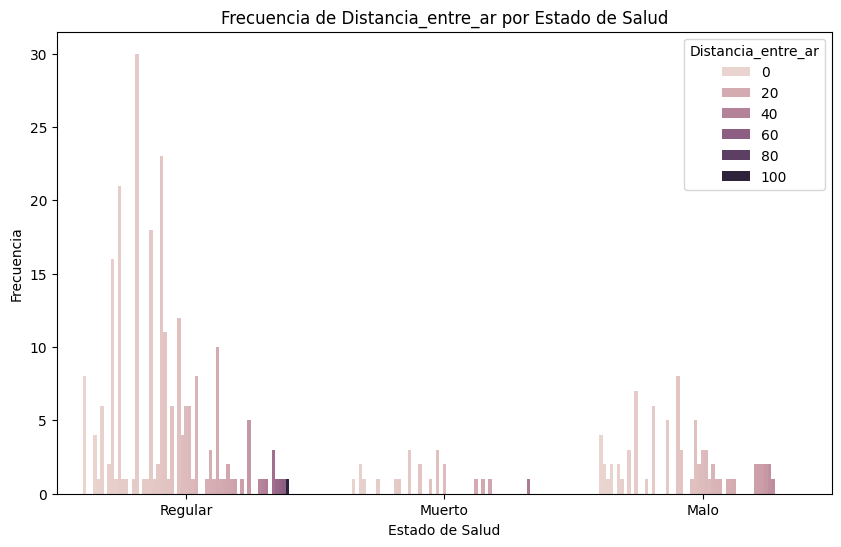

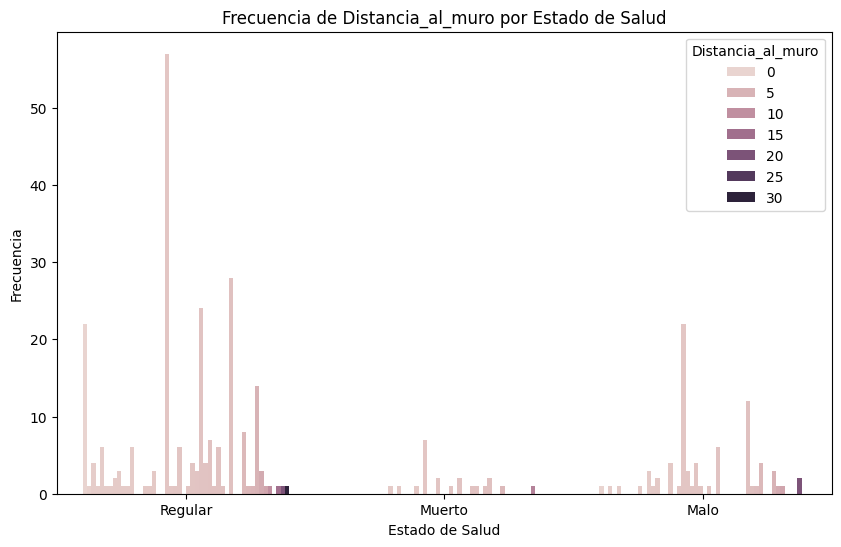

In [34]:

#arbolado_relevanteN = arboladoConRiesgo[columnas_relevantes]
estadisticas_por_estado = arboladoConRiesgo.groupby('estado_salud').describe()


frecuencia_categoricas = {}
for col in columnas_relevantes:
    frecuencia_categoricas[col] = pd.crosstab(arboladoConRiesgo[col], arboladoConRiesgo['estado_salud'])

for col, tabla in frecuencia_categoricas.items():
    print(f'\nFrecuencia de {col} por estado de salud:\n', tabla)


#genero un bucle para generar todos los gráficos
for col in columnas_relevantes:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=arboladoConRiesgo, x='estado_salud', hue=col)
    plt.xlabel('Estado de Salud')
    plt.ylabel('Frecuencia')
    plt.title(f'Frecuencia de {col.capitalize()} por Estado de Salud')
    plt.legend(title=col.capitalize())
    plt.show()

# Tablas Cruzadas

In [35]:
#creo una tabla cuzada entre el estado de salud y el riesgo a fin de hacer un mapa de calor
cruce = pd.crosstab(arboladoConRiesgo['estado_salud'], arboladoConRiesgo['riesgo'])





Text(0.5, 1.0, 'Mapa de Calor Salud/Riesgo')

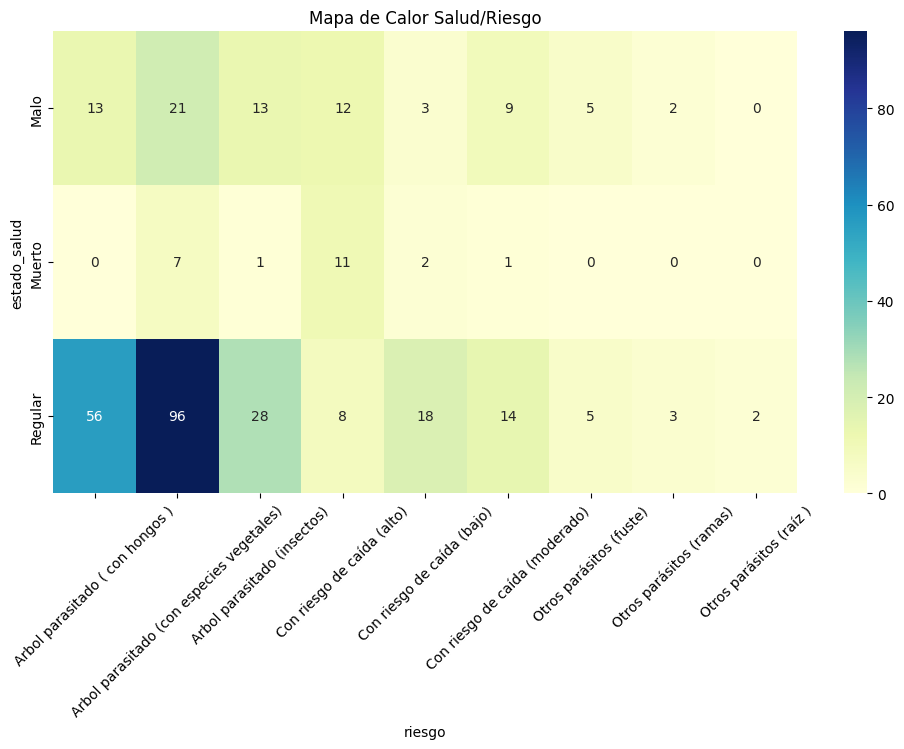

In [36]:
plt.figure(figsize=(12, 6))
sns.heatmap(cruce, annot=True, fmt="d", cmap="YlGnBu")
plt.xticks(rotation=45)
plt.title("Mapa de Calor Salud/Riesgo")
#plt.savefig(save_path + 'saludRiesgo.png', bbox_inches='tight')

In [37]:
cruce


riesgo,Arbol parasitado ( con hongos ),Arbol parasitado (con especies vegetales),Arbol parasitado (insectos),Con riesgo de caída (alto),Con riesgo de caída (bajo),Con riesgo de caída (moderado),Otros parásitos (fuste),Otros parásitos (ramas),Otros parásitos (raíz )
estado_salud,,,,,,,,,
Malo,13,21,13,12,3,9,5,2,0
Muerto,0,7,1,11,2,1,0,0,0
Regular,56,96,28,8,18,14,5,3,2


# Correlacion de Variables

In [39]:
#busco ver la correlación entre las variables
import scipy.stats as stats
from sklearn.feature_selection import chi2
import numpy as np

In [40]:
X2 = stats.chi2_contingency(cruce)


In [ ]:
X2

Chi2ContingencyResult(statistic=85.44403046428039, pvalue=1.712692260533888e-11, dof=16, expected_freq=array([[17.75      , 35.        , 11.        , 11.        ,  8.        ,
         8.        ,  3.25      ,  1.25      ,  1.75      ],
       [ 4.39175258,  8.65979381,  2.72164948,  2.72164948,  1.97938144,
         1.97938144,  0.80412371,  0.30927835,  0.43298969],
       [48.85824742, 96.34020619, 30.27835052, 30.27835052, 22.02061856,
        22.02061856,  8.94587629,  3.44072165,  4.81701031]]))

In [41]:
chi_stat = X2[0]
# Size of the sample
n = len(arboladoSaludNegativa)

# Minimum dimension
# Minimum between Number of categories in rows-1
# categs columns-1
k=min(cruce.shape)


# Calculate Cramer's V
V = np.sqrt((chi_stat/n) / (k-1))

In [42]:
V

0.2600088924826982

In [43]:
def corr_cat_cat(col1,col2):
  cont_table = pd.crosstab(index= arboladoSaludNegativa[col1],
                          columns= arboladoSaludNegativa[col2])
  X2 = stats.chi2_contingency(cont_table)[0]
  k=min(cont_table.shape)
  V = np.sqrt((X2/n) / (k-1))
  return V

In [44]:
#Genero un nuevo Dataset las correlaciones entre la variable estado de Salud y las otras

correlaciones = {}

# Calcular las correlaciones y almacenarlas en el diccionario
for var in columnas_relevantes:
    correlaciones[var] = corr_cat_cat('estado_salud', var)

# Convertir el diccionario en un DataFrame
correlaciones_df = pd.DataFrame.from_dict(correlaciones, orient='index', columns=['Cramer\'s V'])

# Mostrar la tabla de correlaciones
correlaciones_df = correlaciones_df.sort_values(by="Cramer's V", ascending=False)
correlaciones_df

,Cramer's V
estado_salud,1.000000
distancia_entre_ar,0.399703
distancia_al_muro,0.371041
fase_vital,0.361160
especie,0.315657
riesgo,0.294499
ahuecamiento,0.269008
altura,0.167622
tipo_cazoleta,0.142675
tipo_tendido,0.125250


In [45]:
#Genero un nuevo Dataset las correlaciones en tre la variable estado de Riesgo y las otras

correlaciones = {}

# Calcular las correlaciones y almacenarlas en el diccionario
for var in columnas_relevantes:
    correlaciones[var] = corr_cat_cat('riesgo', var)

# Convertir el diccionario en un DataFrame
correlaciones_df = pd.DataFrame.from_dict(correlaciones, orient='index', columns=['Cramer\'s V'])

# Mostrar la tabla de correlaciones
correlaciones_df = correlaciones_df.sort_values(by="Cramer's V", ascending=False)
correlaciones_df

,Cramer's V
riesgo,1.000000
tipo_calle,0.425181
distancia_entre_ar,0.413527
distancia_al_muro,0.377079
especie,0.369327
estado_salud,0.294499
tipo_tendido,0.282936
inclinacion,0.260602
fase_vital,0.227393
tipo_tierra,0.219044


#Gráficos de Ubicación Geográfica

In [47]:
px.scatter_mapbox(arbolado, lat='lat', lon='lng').update_layout(mapbox_style="carto-positron")

In [48]:
arboladografico = arbolado.copy()
arboladografico.riesgo


,riesgo
0,Sin riesgo de caída
1,Sin riesgo de caída
2,Sin riesgo de caída
3,Sin riesgo de caída
4,Sin riesgo de caída
...,...
3099,Arbol parasitado (con especies vegetales)
3100,Arbol parasitado (insectos)
3101,Sin riesgo de caída
3102,Sin riesgo de caída


In [50]:
#Grafico de ubicación geográficas según riesgo
fig = px.scatter_mapbox(arboladografico, lat='lat', lon='lng', color='riesgo')
px.scatter_mapbox(arboladografico, lat='lat', lon='lng', color='riesgo').update_layout(mapbox_style="carto-positron")
fig.update_layout(
    mapbox_style="carto-positron",
    width=1200,  # Establecer el ancho deseado
    height=800  # Establecer la altura deseada
)
fig.show()

# ML

In [ ]:
import pandas as pd
import numpy as np
#modelos
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#metricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
#herraminetas
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer



In [ ]:
#Determinación de Características y variable objetivo
features = ['altura', 'estado_salud', 'inclinacion', 'especie', 'tipo_cazoleta', 'fase_vital', 'fuste', 'ahuecamiento', 'levantamiento_vereda', 'tipo_tierra', 'tipo_calle', 'luz_led', 'tipo_vereda', 'tipo_tendido', 'distancia_entre_ar', 'distancia_al_muro']
X = arbolado[features]
y = arbolado['riesgo']


In [ ]:
# Determinación de set de Entrnamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#lista de Variables numéricas
lista_numeric_features = arbolado.select_dtypes(include=['int64', 'float64']).columns
#dropeo columnas molestas
lista_numeric_features = lista_numeric_features.drop(['id_arbol', 'id_seguimiento', 'lng', 'lat'])


In [ ]:
#lista de Variables categóricas
lista_categorical_features = arbolado.select_dtypes(include=['object']).drop(['riesgo'], axis=1).columns
#dropeo columnas molestas
lista_categorical_features = lista_categorical_features.drop(['fecha_hora', 'tipo_seguimiento', 'direccion', 'lado_vereda'])


In [ ]:
#tansformador numérico standar
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
#trasformador categorico standar, se modifica para dejar unicmante oneHot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, lista_numeric_features),
        ('cat', categorical_transformer, lista_categorical_features)
    ],
    sparse_threshold=0
    )

In [ ]:
preprocessor

ColumnTransformer(sparse_threshold=0,
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['distancia_entre_ar', 'distancia_al_muro'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['estado_salud', 'fuste', 'tipo_cazoleta', 'ahuecamiento', 'inclinacion',
       'altura', 'fase_vital', 'levantamiento_vereda', 'tipo_tierra',
       'tipo_calle', 'luz_led', 'tipo_vereda', 'especie', 'tipo_tendido'],
      dtype='object'))])

In [ ]:
#Lo voy a Usar con LIME
X_train_prepro=preprocessor.fit_transform(X_train)
X_train_prepro
X_test_prepro=preprocessor.transform(X_test)

In [ ]:
pd.DataFrame(X_train_prepro, columns=preprocessor.get_feature_names_out())

,num__distancia_entre_ar,num__distancia_al_muro,cat__estado_salud_Bueno,cat__estado_salud_Malo,cat__estado_salud_Muerto,cat__estado_salud_Regular,cat__fuste_Entre 0.10 y 0.40 m,cat__fuste_Mayor a 0.8 m,cat__fuste_Menor a 0.10 m,cat__tipo_cazoleta_Chica,...,cat__especie_Álamo blanco,cat__especie_Álamo negro,cat__especie_Ñangapirí,cat__tipo_tendido_Alta tensión (Con Protección),cat__tipo_tendido_Alta tensión (Sin Protección),cat__tipo_tendido_Media Tensión (Con Protección),cat__tipo_tendido_Media Tensión (Sin Protección),cat__tipo_tendido_Ninguno,cat__tipo_tendido_Preensamblado,cat__tipo_tendido_Subterraneo
0,-0.017944,-0.024010,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.472305,-0.096346,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.472305,-0.024010,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.890778,-0.102374,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.290561,-0.084290,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478,-0.290561,24.690852,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2479,-0.517741,0.000102,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2480,2.799095,-0.120458,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2481,-0.199688,-0.132514,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:

X_train_prepro_df = pd.DataFrame(X_train_prepro, columns=preprocessor.get_feature_names_out())

In [ ]:
#Empizo a usar la grilla de parametro para implementar searchGrid
params_grid = [

               {
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator':[KNeighborsClassifier()],
                'estimator__n_neighbors': [ 3, 5, 7 ],

                },

               {
                'estimator': [DecisionTreeClassifier()],
                'estimator__max_leaf_nodes': [ 5, 10, 15],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }

               , {
                'estimator': [GaussianNB()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }
              , {
                'estimator': [LogisticRegression(max_iter=1000, solver='saga')],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }
              ,
               {
                'estimator': [RandomForestClassifier()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator__n_estimators': [ 300, 400, 600],
                'estimator__max_depth': [5, 7, 9]

                }

              ]

In [ ]:
#Creo el pipeline
pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('estimator', 'passthrough')])

In [ ]:
#Realizo la validacióncruzada con el grilla para determinar el mejor modelo
GS = GridSearchCV(pipe2, params_grid, cv=5, scoring='accuracy')

GS.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(sparse_threshold=0,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['distancia_entre_ar', 'distancia_al_muro'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),...
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median']},
                         {'estimator': [LogisticRegression(max_iter=1000,
                                                           solver='saga')],
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median']},
                         {'estimator': [RandomForestClassifier()],
                          'estimator__max_depth': [5, 7, 9],
                          'estimator__n_estimators': [300, 400, 600],
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median']}],
             scoring='accuracy')

In [ ]:
pd.DataFrame(GS.cv_results_).sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__n_neighbors,param_preprocessor__num__imputer__strategy,param_estimator__max_leaf_nodes,param_estimator__max_depth,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,1.302366,0.278684,0.054666,0.008742,RandomForestClassifier(),NaN,median,NaN,9.0,400.0,"{'estimator': RandomForestClassifier(), 'estim...",0.776660,0.796781,0.786720,0.731855,0.750000,0.768403,0.024014,1
32,2.043780,0.418009,0.075190,0.007763,RandomForestClassifier(),NaN,mean,NaN,9.0,600.0,"{'estimator': RandomForestClassifier(), 'estim...",0.776660,0.796781,0.784708,0.731855,0.750000,0.768001,0.023719,2
28,1.216587,0.256684,0.055996,0.012091,RandomForestClassifier(),NaN,mean,NaN,9.0,300.0,"{'estimator': RandomForestClassifier(), 'estim...",0.776660,0.794769,0.786720,0.725806,0.750000,0.766791,0.025452,3
30,1.313634,0.258386,0.056633,0.008859,RandomForestClassifier(),NaN,mean,NaN,9.0,400.0,"{'estimator': RandomForestClassifier(), 'estim...",0.774648,0.790744,0.784708,0.731855,0.747984,0.765988,0.022484,4
33,1.700234,0.013486,0.068552,0.001634,RandomForestClassifier(),NaN,median,NaN,9.0,600.0,"{'estimator': RandomForestClassifier(), 'estim...",0.776660,0.792757,0.784708,0.727823,0.747984,0.765986,0.024338,5
29,0.857548,0.006286,0.041693,0.001804,RandomForestClassifier(),NaN,median,NaN,9.0,300.0,"{'estimator': RandomForestClassifier(), 'estim...",0.778672,0.788732,0.784708,0.723790,0.752016,0.765584,0.024510,6
26,1.807000,0.376661,0.081287,0.021170,RandomForestClassifier(),NaN,mean,NaN,7.0,600.0,"{'estimator': RandomForestClassifier(), 'estim...",0.768612,0.788732,0.784708,0.723790,0.752016,0.763572,0.023754,7
27,1.877114,0.341385,0.061811,0.000683,RandomForestClassifier(),NaN,median,NaN,7.0,600.0,"{'estimator': RandomForestClassifier(), 'estim...",0.770624,0.790744,0.782696,0.721774,0.752016,0.763571,0.024635,8
23,0.779621,0.015378,0.037411,0.003286,RandomForestClassifier(),NaN,median,NaN,7.0,300.0,"{'estimator': RandomForestClassifier(), 'estim...",0.768612,0.790744,0.784708,0.721774,0.752016,0.763571,0.024864,8
25,1.111035,0.200780,0.046062,0.002402,RandomForestClassifier(),NaN,median,NaN,7.0,400.0,"{'estimator': RandomForestClassifier(), 'estim...",0.770624,0.790744,0.784708,0.719758,0.752016,0.763570,0.025644,10


In [ ]:
GS.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['distancia_entre_ar', 'distancia_al_muro'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['estado_salud', 'fuste', 'tipo_cazoleta', 'ahuecamiento', 'inclinacion',
       'altura', 'fase_vital', 'levantamiento_vereda', 'tipo_tierra',
       'tipo_calle', 'luz_led', 'tipo_vereda', 'especie', 'tipo_tendido'],
      dtype='object'))])),
                ('estimator',
                 RandomForestClassifier(max_depth=9, n_estimators=400))])

In [ ]:
modelo_final=GS.best_estimator_

In [ ]:
#Entreno el mejor modelo obtenido
modelo_final.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['distancia_entre_ar', 'distancia_al_muro'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['estado_salud', 'fuste', 'tipo_cazoleta', 'ahuecamiento', 'inclinacion',
       'altura', 'fase_vital', 'levantamiento_vereda', 'tipo_tierra',
       'tipo_calle', 'luz_led', 'tipo_vereda', 'especie', 'tipo_tendido'],
      dtype='object'))])),
                ('estimator',
                 RandomForestClassifier(max_depth=9, n_estimators=400))])

In [ ]:
#Verificacion de score del modelo
modelo_final.score(X_test,y_test)

0.782608695652174

In [ ]:
probaviliades = modelo_final.predict_proba(X_test)


In [ ]:
prob = modelo_final.predict_proba(sample)
prob

array([[1.06790056e-02, 1.78595973e-01, 9.92898207e-03, 4.35949400e-03,
        1.01946583e-02, 9.34161875e-03, 8.94067766e-04, 1.83078271e-03,
        7.64909044e-04, 7.73410509e-01]])

In [ ]:
modelo_final.predict_proba(X_test)

array([[1.06790056e-02, 1.78595973e-01, 9.92898207e-03, ...,
        1.83078271e-03, 7.64909044e-04, 7.73410509e-01],
       [1.52731861e-02, 1.33521963e-01, 1.17823003e-02, ...,
        4.27338366e-04, 7.11049369e-05, 8.30046561e-01],
       [3.07054891e-03, 3.65951034e-02, 8.06535236e-03, ...,
        4.50651493e-04, 6.43120891e-05, 9.47080705e-01],
       ...,
       [2.00599968e-02, 1.33057152e-01, 2.52736203e-02, ...,
        2.47862837e-04, 2.61798145e-04, 8.12022859e-01],
       [1.23594895e-02, 7.14544267e-02, 6.02317655e-02, ...,
        5.57741356e-04, 2.38911123e-04, 8.42176586e-01],
       [1.16853546e-02, 1.44969439e-01, 1.01004923e-02, ...,
        1.19681811e-03, 3.04864068e-04, 8.09275821e-01]])

## Explicabilidad con Shap


In [ ]:
!pip install shap

In [ ]:
import shap



In [ ]:
#guardo el nombre del modelo final que está en el pipeline
arbol_final = modelo_final.named_steps['estimator']

In [ ]:
# Obtener las características transformadas
X_train_transformed = modelo_final.named_steps['preprocessor'].transform(X_train)
X_test_transformed = modelo_final.named_steps['preprocessor'].transform(X_test)

In [ ]:
#obtener las feature names
feature_names = modelo_final.named_steps['preprocessor'].get_feature_names_out()

In [ ]:
explainer = shap.TreeExplainer(arbol_final)

In [ ]:
explainer.expected_value

array([2.58699154e-02, 1.41061216e-01, 2.42086186e-02, 1.29550946e-02,
       1.78674990e-02, 1.45861861e-02, 2.89065646e-03, 2.78091019e-03,
       4.03745469e-04, 7.57376158e-01])

In [ ]:
shap_values = explainer.shap_values(X_test_transformed)

In [ ]:
#preparación para impreción del grafico multicase
class_labels = modelo_final.classes_
print(class_labels)
class_index = 9 # Clase específica de interés
sample_index = 0  # Índice de la muestra específica
muestra=81
class_label = class_labels[class_index]
print("Este es el riesgo 9 " + class_label)
print(shap_values.shape)
shap_values_for_class = shap_values[sample_index, :, class_index]
print(shap_values_for_class.shape)

['Arbol parasitado ( con hongos )'
 'Arbol parasitado (con especies vegetales)' 'Arbol parasitado (insectos)'
 'Con riesgo de caída (alto)' 'Con riesgo de caída (bajo)'
 'Con riesgo de caída (moderado)' 'Otros parásitos (fuste)'
 'Otros parásitos (ramas)\r\n' 'Otros parásitos (raíz )'
 'Sin riesgo de caída']
Este es el riesgo 9 Sin riesgo de caída
(621, 143, 10)
(143,)


In [ ]:
#Prueba de grafico con shap a aprtir de los datos obtenidos y utilizando una clase fija solo a modo de prueba
#en la implemetación en produción estos valores se deben obtener en función de la predicción obtenida
print(f"Clase: {class_label}")
print(f"Tamaño de los valores de SHAP: {shap_values_for_class.shape}")
shap.initjs()

shap.force_plot(explainer.expected_value[class_index], shap_values_for_class, X_test_transformed[muestra], feature_names=feature_names)

NameError: name 'class_label' is not defined

In [ ]:
class_index = 6  # Clase específica de interés
sample_index = 0  # Índice de la muestra específica
class_label = class_labels[class_index]
shap_values_for_class = shap_values[sample_index, :, class_index]

In [ ]:
print(f"Clase: {class_label}")
print(f"Tamaño de los valores de SHAP: {shap_values_for_class.shape}")
shap.initjs()
shap.force_plot(explainer.expected_value[class_index], shap_values_for_class, X_test_transformed[0], feature_names=feature_names)

Clase: Otros parásitos (fuste)
Tamaño de los valores de SHAP: (143,)


In [ ]:
shap_values_class = shap_values[0, :, 0]  # Si tienes múltiples clases
print(f"Dimensiones de shap_values_class: {shap_values_class.shape}")
print(f"Dimensiones de X_test_transformed: {X_test_transformed.shape}")


Dimensiones de shap_values_class: (143,)
Dimensiones de X_test_transformed: (621, 143)


In [ ]:
# Crear un gráfico de dependencia para una característica específica
shap.dependence_plot("cat__estado_salud_Bueno", shap_values_class, X_test_transformed feature_names=feature_names)



IndexError: index 2 is out of bounds for axis 1 with size 1

# Empaquetado del Modelo

In [ ]:
from joblib import dump, load
dump([arbol_final, preprocessor], 'arbol_final.joblib', compress=('gzip',9))